In [1]:
import numpy as np
import examples as ex
import time
import op
import osch
import os
import pandas as pd
from imp import reload
#from optim import op,osch
path='c:\\users\\avduryagin\\etc\\'
tpath=os.path.join(path,'task')
opath=os.path.join(tpath,'otm')
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\avduryagin\PycharmProjects\op\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  


In [10]:
reload(osch)

<module 'osch' from 'C:\\Users\\avduryagin\\PycharmProjects\\op\\osch.py'>

In [23]:
data

,pair_address,token0,token0_address,token0_decimals,token0_reserve,token1,token1_address,token1_decimals,token1_reserve,Exchange
0,0x8fcB93C0D9fA361c57c1d31bbF1c4d8C61af7d3d,WMATIC,0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270,18,47324853364545820819456.0,IXT,0xE06Bd4F5aAc8D0aA337D13eC88dB6defC6eAEefE,18,136181167072896295632896.0,QuickSwap
1,0x70294d7aa244BD342C536F9B502152564057162e,WOO,0x1B815d120B3eF02039Ee11dC2d33DE7aA4a8C603,18,342533833098608508928000.0,WETH,0x7ceB23fD6bC0adD59E62ac25578270cFf1b9f619,18,32034067999746289664.0,QuickSwap
2,0x59377dbd9f550568540cAe0B21412bee1cC3F439,USDC,0x2791Bca1f2de4661ED88A30C99A7a9449Aa84174,6,72286787821.0,JPYC,0x431D5dfF03120AFA4bDf332c61A6e1766eF37BDB,18,9549120095138108118401024.0,QuickSwap
3,0x3Ff616172e87429A037e4B42843FB11bF0C945bB,WETH,0x7ceB23fD6bC0adD59E62ac25578270cFf1b9f619,18,6297265327461163008.0,SX,0x840195888Db4D6A99ED9F73FcD3B225Bb3cB1A79,18,50182368281674983145472.0,QuickSwap
4,0x369582d2010B6eD950B571F4101e3bB9b554876F,WMATIC,0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270,18,2398485772922111127453696.0,SAND,0xBbba073C31bF03b8ACf7c28EF0738DeCF3695683,18,4322054731783571230425088.0,QuickSwap
...,...,...,...,...,...,...,...,...,...,...
1190,0x5B14B9205d79cb9E8B6A3bCa759f51A65E0155e2,HNY,0x1FA2F83BA2DF61c3d370071d61B17Be01e224f3a,18,40379085849729332936704.0,USDC,0x2791Bca1f2de4661ED88A30C99A7a9449Aa84174,6,138333559472.0,Sushiswap
1191,0x155F7746e738522a0e8587832bA6B594B078143a,USDC,0x2791Bca1f2de4661ED88A30C99A7a9449Aa84174,6,851604584.0,JPYC,0x431D5dfF03120AFA4bDf332c61A6e1766eF37BDB,18,113153435534317492109312.0,Sushiswap
1192,0x374552804F7CA26C307c8D31f4cC0d9215C87f46,ZED,0x5eC03C1f7fA7FF05EC476d19e34A22eDDb48ACdc,18,3354176403379826146148352.0,WETH,0x7ceB23fD6bC0adD59E62ac25578270cFf1b9f619,18,70487010305975853056.0,Sushiswap
1193,0x72bdf2DbCD73DdDda84D78994095fBcfD1253127,USDC,0x2791Bca1f2de4661ED88A30C99A7a9449Aa84174,6,13183922434.0,SHARD,0x41E5Ae7581C06C4C53Ac2D29a8857260C161eE71,6,1418454108699.0,Sushiswap


In [22]:
file="V2_suhi_quick_limits.xlsx"
sheet_name=["QuickSwap","Sushiswap"]
columns=['pair_address', 'token0', 'token0_address',
       'token0_decimals', 'token0_reserve', 'token1', 'token1_address',
       'token1_decimals', 'token1_reserve']
L=[]
for s in sheet_name:
    data=pd.read_excel(os.path.join(path,file),sheet_name=s)
    data=data[columns]
    data.loc[:,'Exchange']=s
    L.append(data.values)
data=pd.DataFrame(data=np.vstack(L),columns=['pair_address', 'token0', 'token0_address',
       'token0_decimals', 'token0_reserve', 'token1', 'token1_address',
       'token1_decimals', 'token1_reserve','Exchange'])
    
    


In [13]:
file="quick_swap.csv"
data[columns].to_csv(os.path.join(path,file),index_label=False)

In [15]:
file="quick_swap.csv"
data=pd.read_csv(os.path.join(path,file))

In [18]:
data['token0'].value_counts()

WMATIC             466
USDC               243
WETH                90
DAI                  8
miMATIC              3
                  ... 
WHEY                 1
AXI                  1
ALPHA                1
invETHDOM-SEP22      1
GEAR                 1
Name: token0, Length: 162, dtype: int64

In [19]:
data['token1'].value_counts()

WETH        83
USDC        46
WMATIC      28
DAI         14
miMATIC      8
            ..
PLOW         1
PENG4815     1
RVRS         1
CIOTX        1
AVATAR       1
Name: token1, Length: 703, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 975
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pair_address     976 non-null    object 
 1   token0           976 non-null    object 
 2   token0_address   976 non-null    object 
 3   token0_decimals  976 non-null    int64  
 4   token0_reserve   976 non-null    float64
 5   token1           976 non-null    object 
 6   token1_address   976 non-null    object 
 7   token1_decimals  976 non-null    int64  
 8   token1_reserve   976 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 76.2+ KB


In [12]:
#mask=np.array([2,7,11,14,15],dtype=np.int16)
used=np.load(path+'task\\used.npy')
support=np.load(path+'task\\support.npy')
group=np.load(path+'task\\groups.npy')
Q0=np.load(path+'task\\Q0.npy')
Q1=np.load(path+'task\\Q1.npy')
tr=np.load(path+'task\\tr.npy')
ts1=np.load(path+'task\\ts.npy')

wells_allowed=np.load(path+'task\\wells_allowed.npy')
groups_allowed=np.load(path+'task\\groups_allowed.npy')
mask=np.array([2,7,11,14,15],dtype=np.int16)
#mask=np.arange(group.shape[0])
group=group[mask]
used=used[mask]
groups_allowed=groups_allowed[:,mask]
current_places=np.array([used,group],dtype=np.int16)

#pairs=np.load(path+'pairs.npy')
#support=np.empty(shape=(Q0.shape[0],2))
#support.fill(np.nan)
#wells_allowed.fill(True)
#groups_allowed.fill(True)
#service=np.load(path+'service.npy')
#equipment=np.load(path+'equipment.npy')
#wells_service=np.load(path+'wells_service.npy',allow_pickle=True)
#wells_equipment=np.load(path+'wells_equipment.npy',allow_pickle=True)

#pairs=np.ones(shape=pairs.shape,dtype=bool)
t1=time.perf_counter()
wsch=osch.wells_schedule()
wsch.engine='c'
#wsch.t=(tr.sum()/16)*1.1
wsch.t=360
wsch.tracing=True
stop=int(Q0.shape[0]/1)
wsch.fun=wsch.f14

wsch.fit(ts1,tr,Q0,Q1,current_places,stop=stop,support=support,groups_allowed=groups_allowed,wells_allowed=wells_allowed,epsilon=np.inf)
#wsch.function=op.get_optim_trajectory
#wsch.fit_v1(ts1,tr,Q0,Q1,group,stop=stop,support=support,used=used,epsilon=np.inf,service=service,equipment=equipment,wells_service=wells_service,wells_equipment=wells_equipment,prohibits=pairs,tracing=True)
#free=np.arange(Q0.shape[0])
#umask=np.isin(free,group)
#smask=~np.isnan(support[:,0])
mask=np.isin(wsch.free,wsch.supported)
#mask=(~umask)&smask
wsch.free=wsch.free[mask]
free=wsch.free.copy()
t1=time.perf_counter()
trace=wsch.get_routes()
t2=time.perf_counter()
print('time=',t2-t1)
R,T,D,O=osch.get_rout_time(trace)
print('not used '+str(wsch.free.shape[0]))


time= 0.20613890000004176
not used 9


In [195]:
np.save(path+'task\\T.npy',T)
np.save(path+'task\\D.npy',D)
np.save(path+'task\\R.npy',R)

In [25]:
used=np.load(path+'task\\used.npy')
support=np.load(path+'task\\support.npy')
group=np.load(path+'task\\groups.npy')
Q0=np.load(path+'task\\Q0.npy')
Q1=np.load(path+'task\\Q1.npy')
tr=np.load(path+'task\\tr.npy')
ts1=np.load(path+'task\\ts.npy')
#pairs=np.load(path+'pairs.npy')
wells_allowed=np.load(path+'task\\wells_allowed.npy')
groups_allowed=np.load(path+'task\\groups_allowed.npy')
mask=np.array([2,7,11,14,15],dtype=np.int16)
#mask=np.arange(group.shape[0])
group=group[mask]
used=used[mask]
groups_allowed=groups_allowed[:,mask]
current_places=np.array([used,group],dtype=np.int16)
#R=np.load(path+'task\\R.npy')
#T=np.load(path+'task\\T.npy')
#D=np.load(path+'task\\D.npy')

#support=np.empty(shape=(Q0.shape[0],2))
#support.fill(np.nan)

#service=np.load(path+'service.npy')
#equipment=np.load(path+'equipment.npy')
#wells_service=np.load(path+'wells_service.npy',allow_pickle=True)
#wells_equipment=np.load(path+'wells_equipment.npy',allow_pickle=True)

#wells_allowed.fill(True)
#groups_allowed.fill(True)
#pairs=np.ones(shape=pairs.shape,dtype=bool)
permutation=True
wsch=osch.wells_schedule()
wsch.engine='c'
#wsch.t=(tr.sum()/16)*1.1
wsch.t=360*3
wsch.tracing=False
#stop=int(group.shape[0]*3)
stop=Q0.shape[0]
wsch.fun=wsch.f6
wsch.routes=R
wsch.start=D
wsch.end=T
#wsch.fit_v1(ts1,tr,Q0,Q1,group,stop=stop,support=support,used=used,epsilon=tr.mean(),service=service,equipment=equipment,wells_service=wells_service,wells_equipment=wells_equipment,prohibits=pairs)

#wsch.function=op.get_optim_trajectory_fast
wsch.fit(ts1,tr,Q0,Q1,current_places,stop=stop,support=support,permutation=permutation,groups_allowed=groups_allowed,wells_allowed=wells_allowed,epsilon=tr.mean())
t1=time.perf_counter()
trace=wsch.get_routes()
t2=time.perf_counter()
print('time=',t2-t1)
R_,T_,D_,O=osch.get_rout_time(trace)
print('not used '+str(wsch.free.shape[0]))

time= 1.1333427999998094
not used 9


In [5]:
subpath=os.path.join(path,'task\\otm\\')
print(subpath)

c:\users\avduryagin\etc\task\otm\


In [15]:
import sys

In [17]:
os.getcwd()

'C:\\Users\\avduryagin\\PycharmProjects\\op'

In [19]:
otm_raw

,Pad,Well,Unnamed: 2,Well type,Start date,End date,Период проведеняи,"Duration, hrs"
0,PAD_16_WS,WS_1073,4,OP,2017-01-11 10:36:00,2017-01-11 11:36:00,NaN,1.000000
1,PAD_16_WS,WS_1073,4,OP,2017-01-11 22:36:00,2017-01-11 22:54:00,NaN,0.300000
2,PAD_16_WS,WS_1147,3,OP,2017-01-11 10:36:00,2017-01-11 11:36:00,NaN,1.000000
3,PAD_16_WS,WS_1147,3,OP,2017-01-11 22:36:00,2017-01-11 22:54:00,NaN,0.300000
4,PAD_10_WS,WS_1350,2,OP,2017-01-16 14:35:00,2017-01-16 18:56:00,NaN,4.350000
...,...,...,...,...,...,...,...,...
550,PAD_6_US,US_8138,3,OP,2017-12-22 10:48:00,2017-12-23 08:00:00,NaN,6.000000
551,PAD_6_US,US_23104,5,OP,2017-12-22 10:48:00,2017-12-23 10:48:00,NaN,24.000000
552,PAD_6_US,US_23104,5,OP,2017-12-22 10:48:00,2017-12-23 10:48:00,NaN,24.000000
553,PAD_6_US,US_23104,5,OP,2017-12-22 10:48:00,2017-12-25 13:20:00,NaN,11.333333


In [18]:
otm_raw=pd.read_excel(os.path.join(path,'task\\Итоговые данные rev 2.xlsx'),sheet_name='Данные ОТМ  ',usecols=[0,1,2,3,4,5,6,7],header=0)

In [22]:
otm=pd.read_csv(os.path.join(opath,'OTM_v1.csv'))

In [31]:
otm.columns

Index(['Pad', 'Well', 'Start date', 'End date', 'Период проведеняи',
       'Duration, hrs', 'Process group', 'Веерное отключение',
       'Признак остановки', 'quarter', 'Start', 'End', 'services',
       'group_place', 'Бригада', 'Начало работ', 'Окончание работ', 't1', 't2',
       '_t1', '_t2', 't1_service', 't2_service', 'service'],
      dtype='object')

In [26]:
otm_support

array([[ 10.44166667,  10.48333333],
       [ 10.94166667,  10.95416667],
       [ 10.44166667,  10.48333333],
       ...,
       [355.45      , 356.45      ],
       [355.45      , 358.55555556],
       [273.        , 364.        ]])

In [28]:
res=otm_support[:,1]-otm_support[:,0]

In [33]:
otm_service.shape

(555,)

In [34]:
otm_Q0.shape

(555,)

In [39]:
otm_group

array([279, 280, 455])

In [38]:
service

array([[0, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1]])

In [37]:
equipment

array([[1],
       [1],
       [1]])

In [7]:
subpath=os.path.join(path,'task\\otm\\')
otm_Q0=np.load(os.path.join(subpath,'Q0.npy'))
otm_Q1=np.load(os.path.join(subpath,'Q1.npy'))
otm_distances=np.load(os.path.join(subpath,'ts.npy'))
otm_group=np.load(os.path.join(subpath,'groups.npy'))
otm_support=np.load(os.path.join(subpath,'support.npy'))
service=np.load(os.path.join(subpath,'service.npy'))
equipment=np.load(os.path.join(subpath,'equipment.npy'))
otm_service=np.load(os.path.join(subpath,'well_service.npy'),allow_pickle=True)
otm_tr=np.load(os.path.join(subpath,'tr.npy'))
prohibits=np.load(os.path.join(subpath,'otm_binary.npy'))
expanded=np.load(os.path.join(subpath,'expanded.npy'),allow_pickle=True)[()]
otm_group_support=np.array([[0,24],[9,19],[0,24]])/24
#service=otm_prohibits.astype(np.int32).values

In [24]:

#equipment=np.ones(otm_prohibits.shape[0],dtype=np.int32).reshape(-1,1)

wsch=osh.wells_schedule()
wsch.t=360
#wsch.tracing=True
stop=int(otm_Q0.shape[0]/2)
wsch.fun=wsch.f14
wsch.fit(otm_distances,otm_tr,otm_Q0,otm_Q1,otm_group,support=otm_support,tracing=True,stop=stop,epsilon=np.inf,service=service, equipment=equipment,wells_service=otm_service,prohibits=prohibits,group_support=otm_group_support)
#wsch.fit(otm_distances,otm_tr,otm_Q0,otm_Q1,otm_group,support=otm_support,stop=stop,epsilon=np.inf,service=service, equipment=equipment,wells_service=otm_service,prohibits=None)
wsch.update_debit_functions(expanded)
mask=np.isin(wsch.free,wsch.supported)
wsch.free=wsch.free[mask]
t1=time.perf_counter()
trace=wsch.get_routes()
t2=time.perf_counter()
print('time=',t2-t1)
R,T,D,O=osh.get_rout_time(trace)
print('not used '+str(wsch.free.shape[0]))

0.0005373100000269915 162.67688106738484


In [5]:
from imp import reload

In [17]:
reload(osch)

<module 'osch' from 'C:\\Users\\avduryagin\\PycharmProjects\\op\\osch.py'>

In [64]:
seeds=np.random.randint(100,size=6)

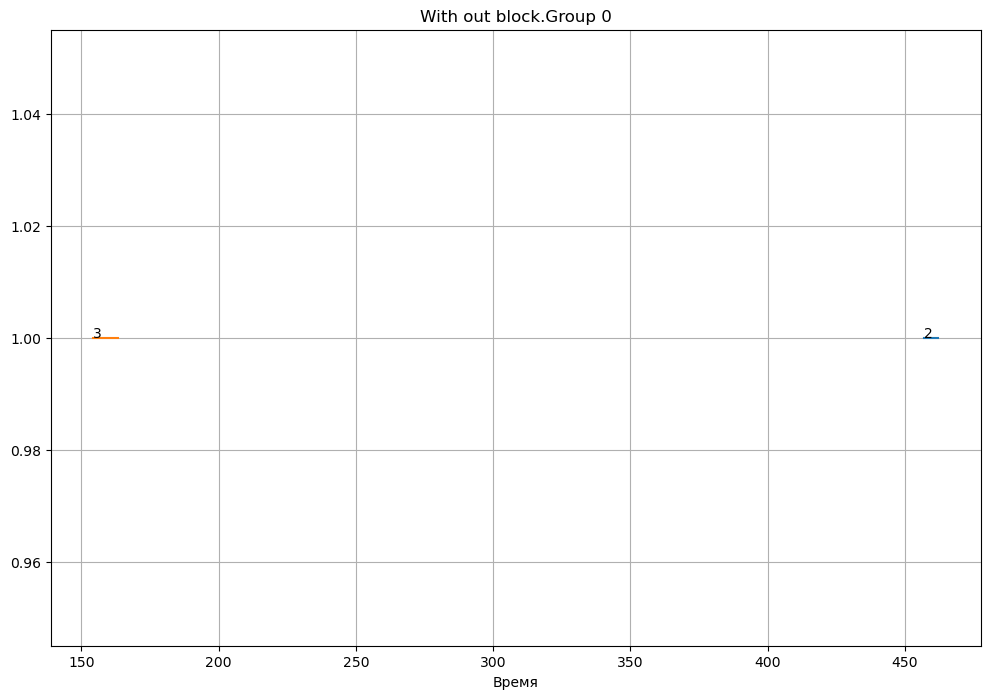

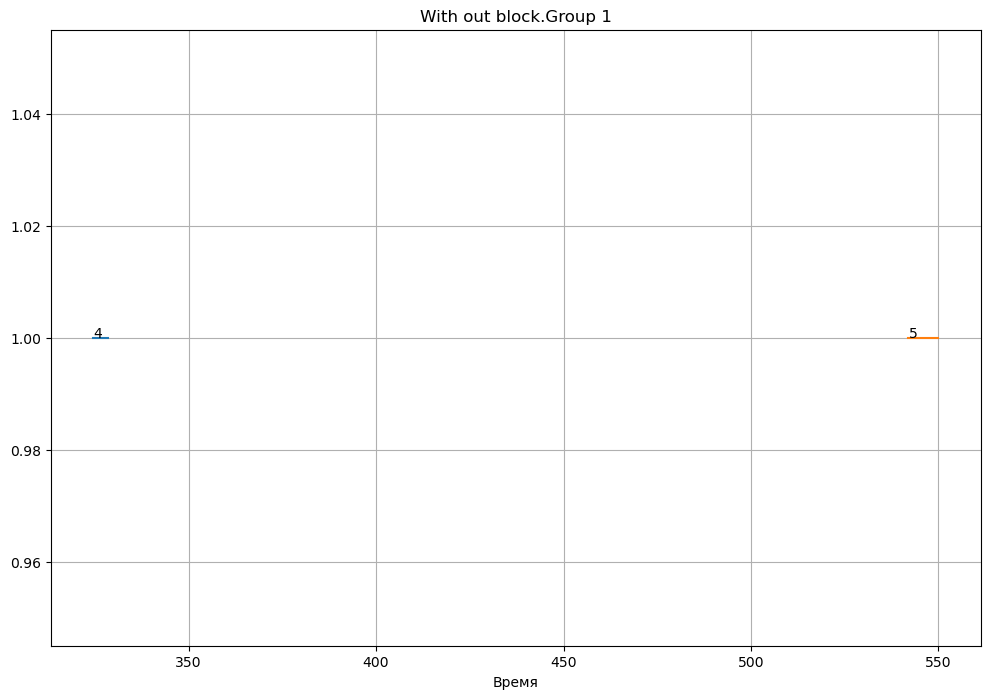

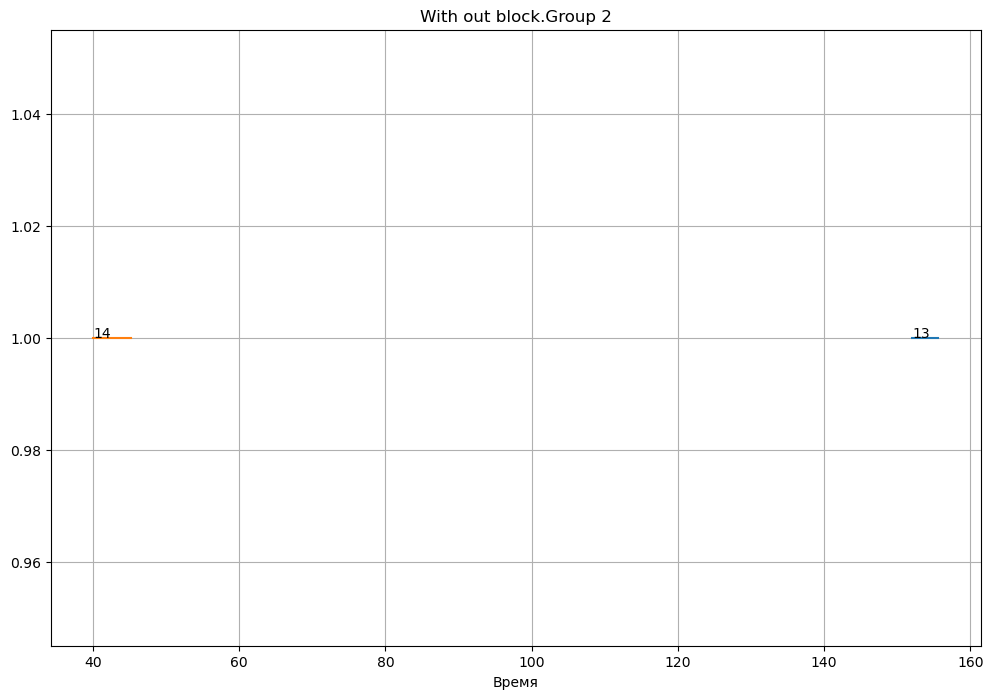

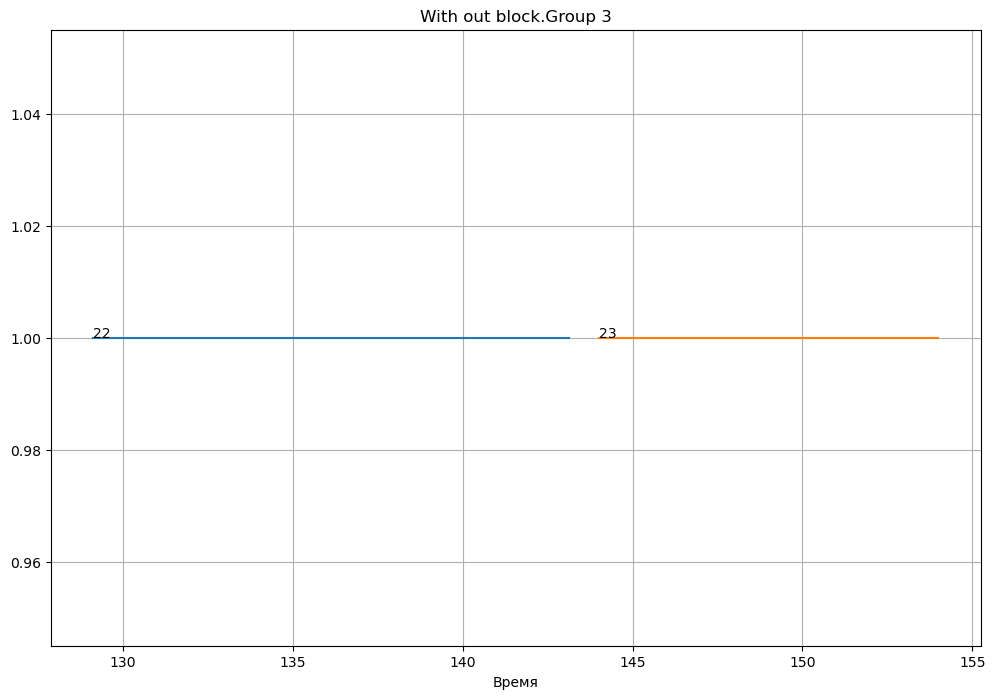

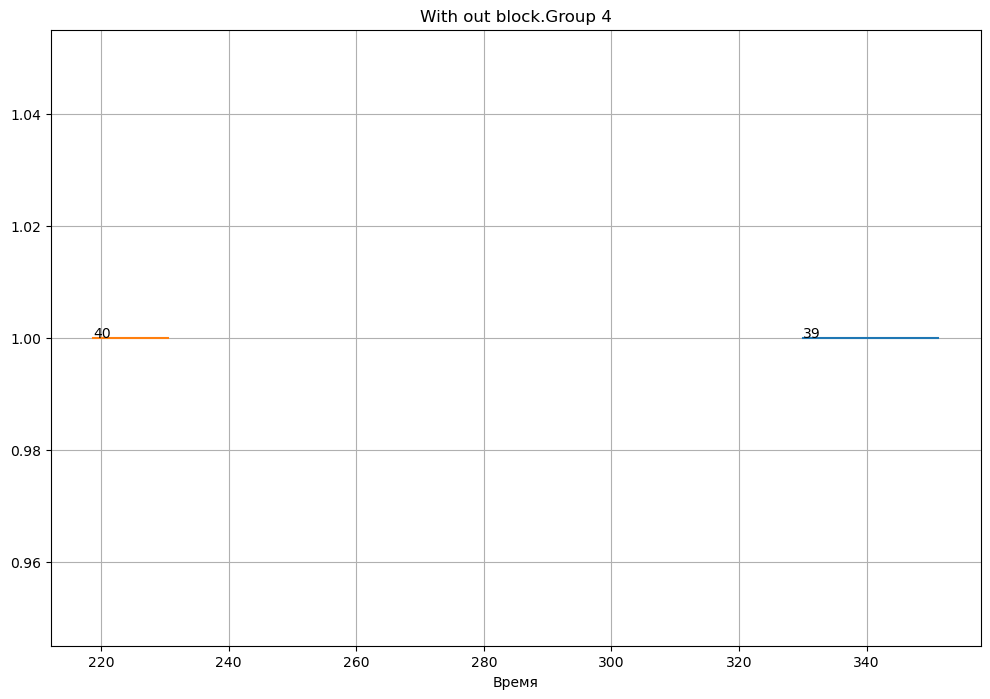

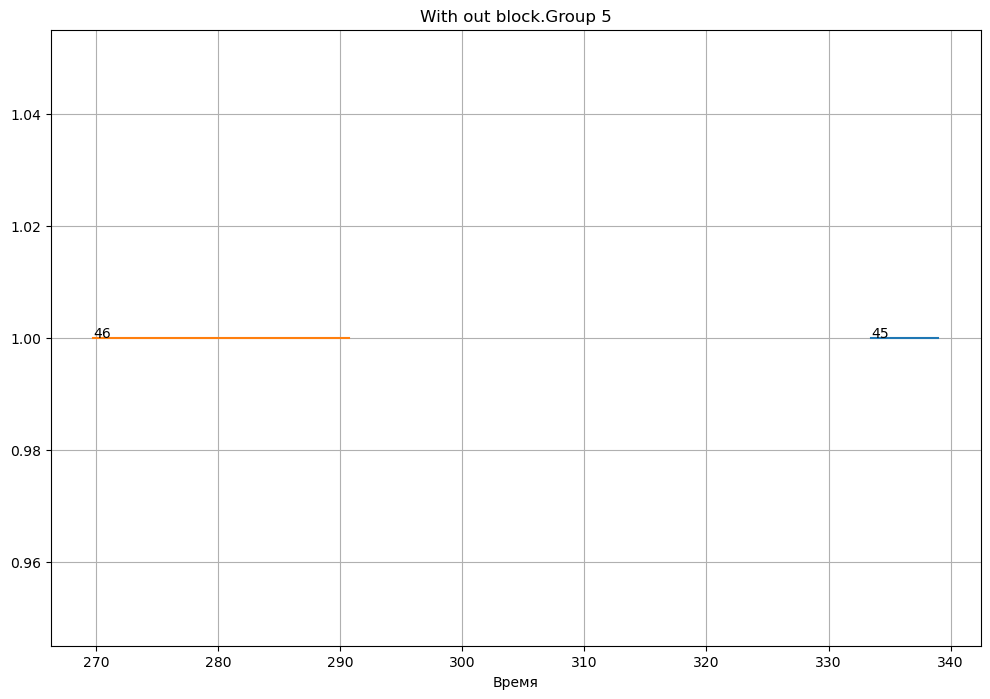

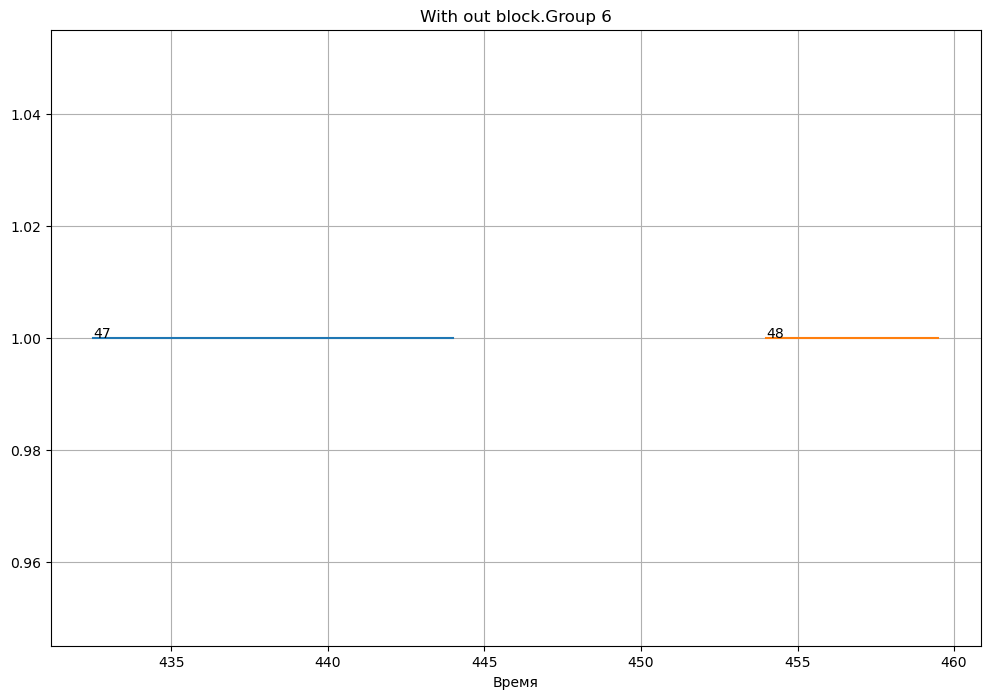

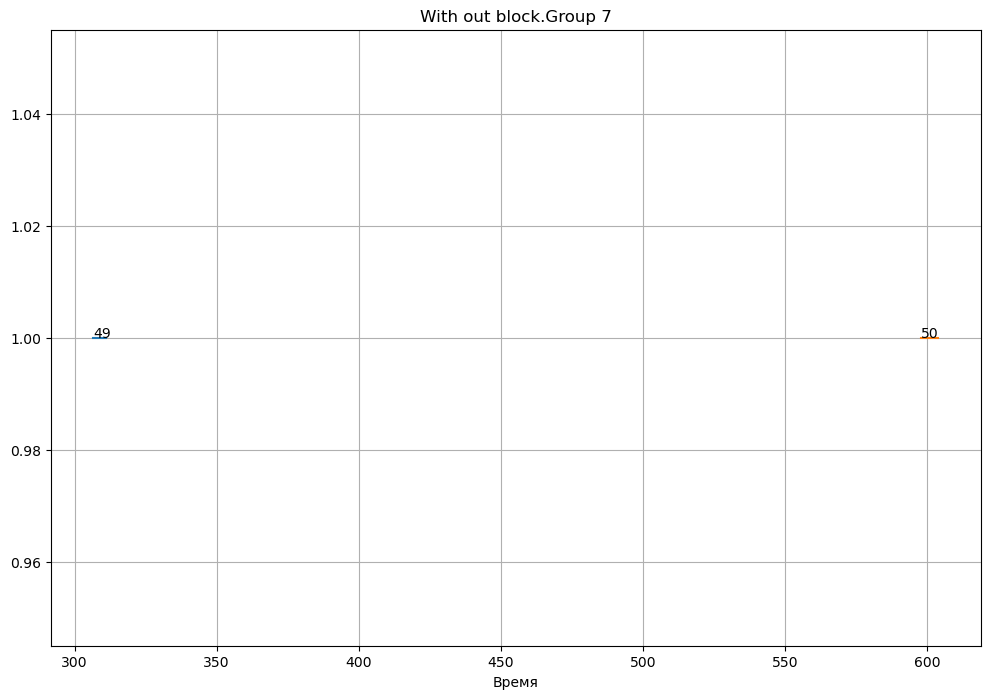

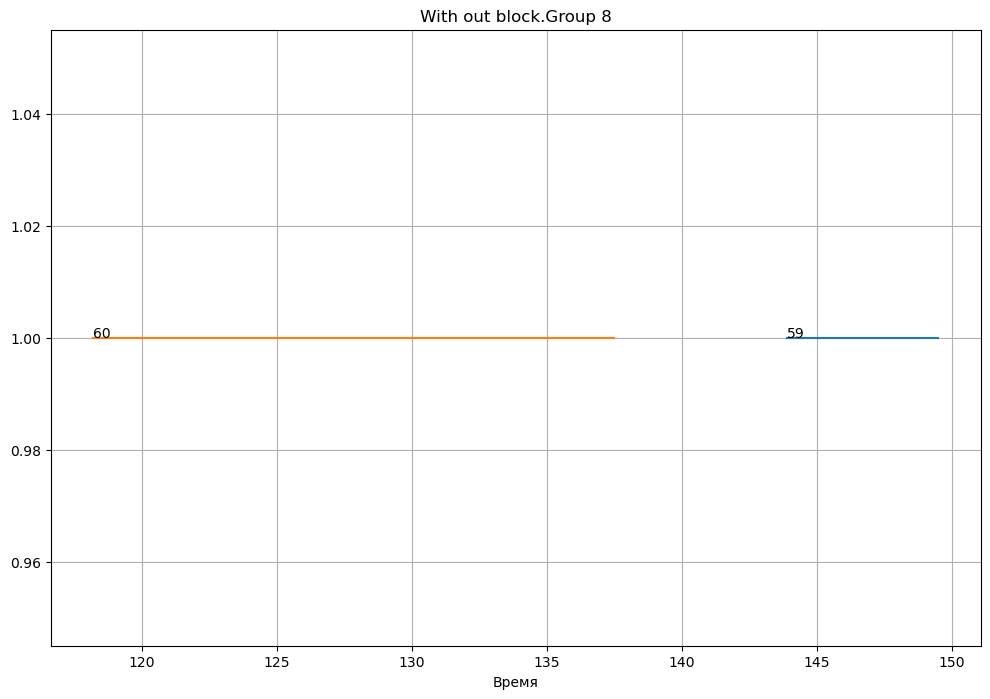

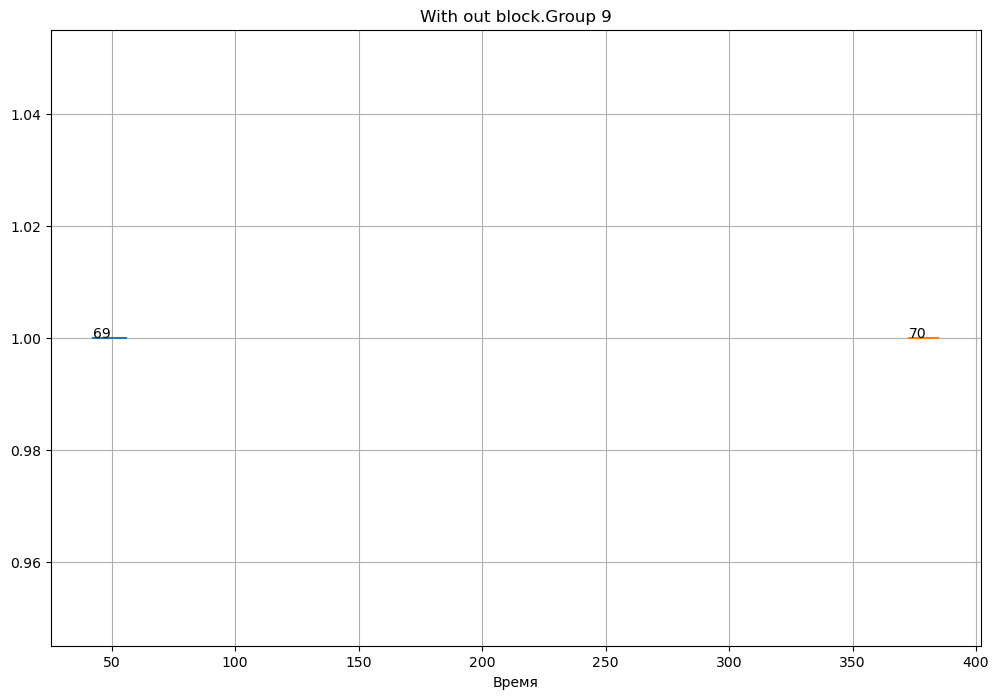

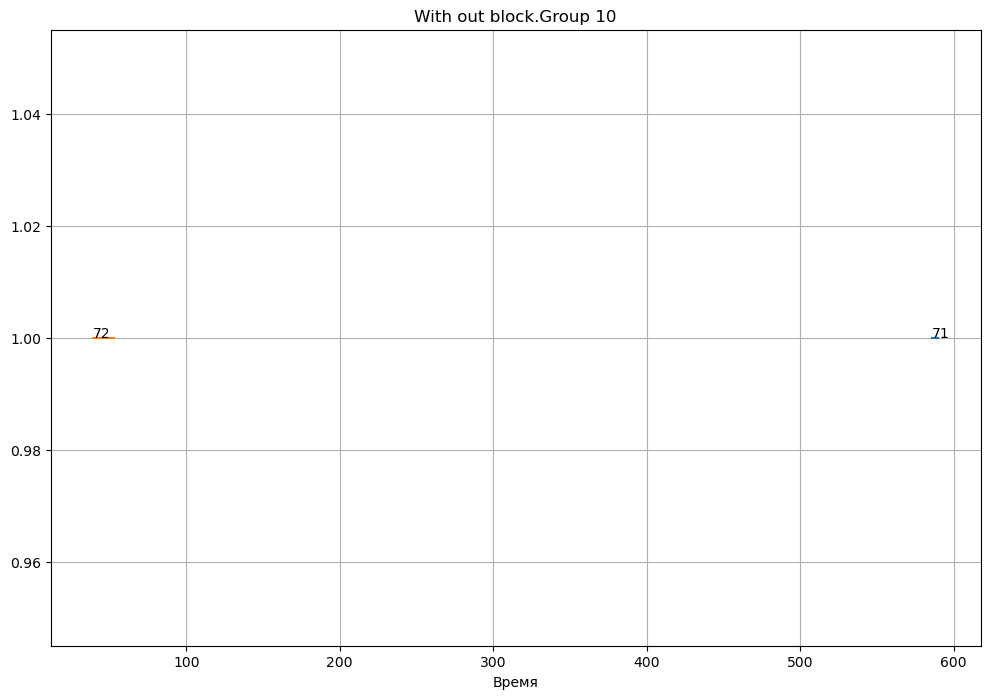

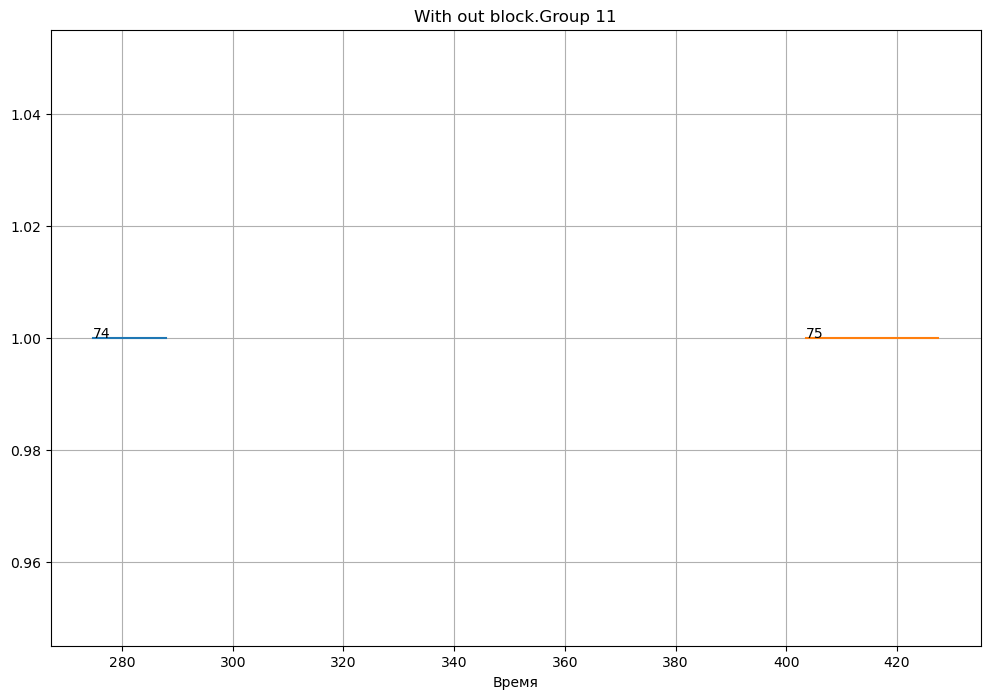

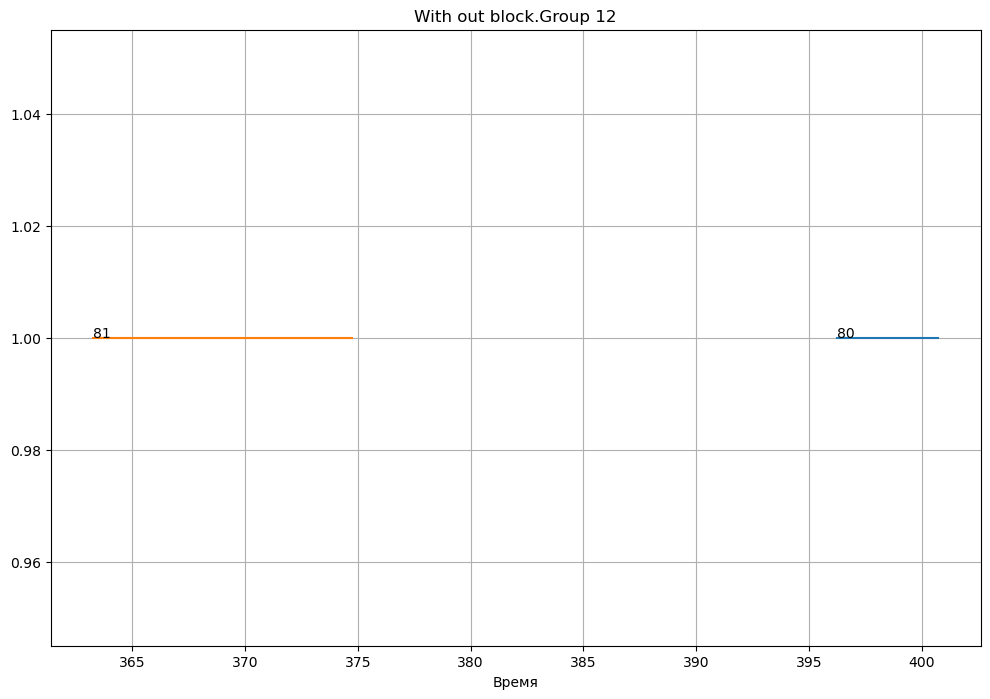

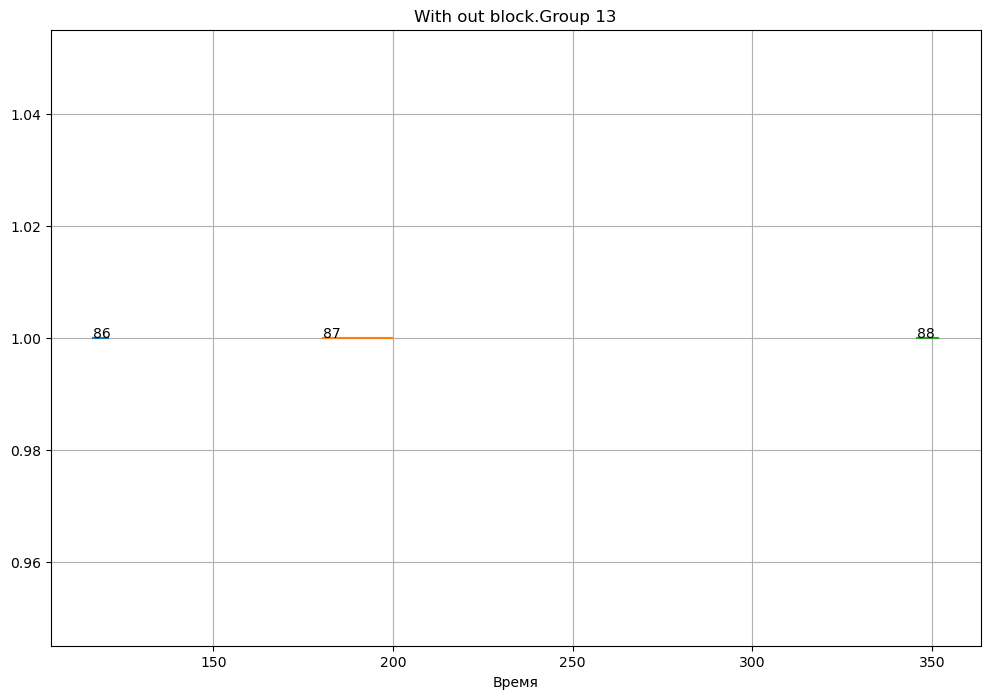

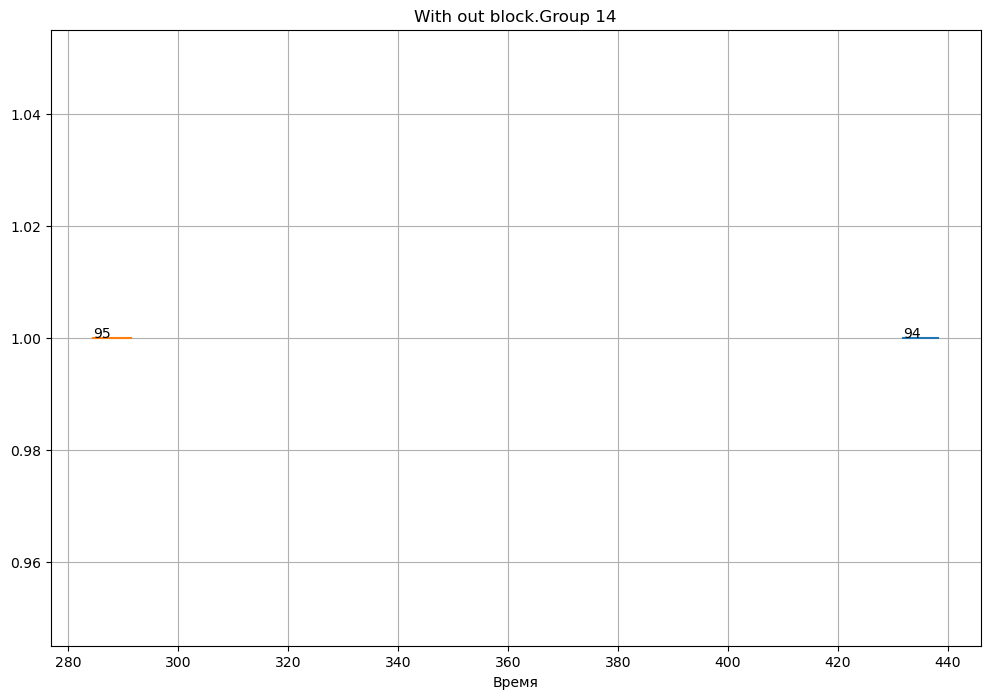

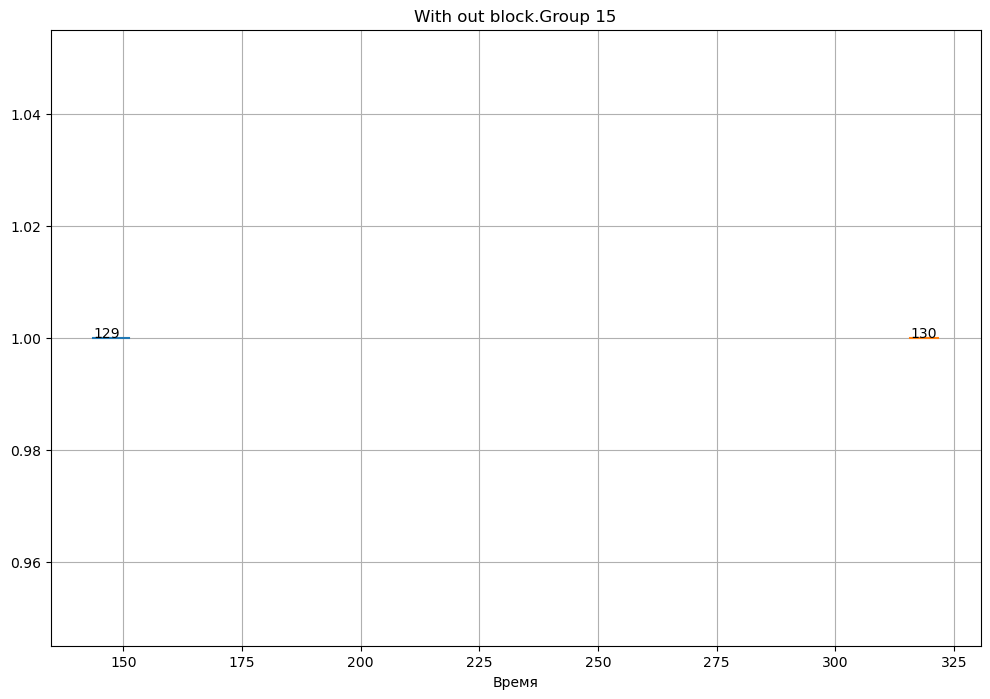

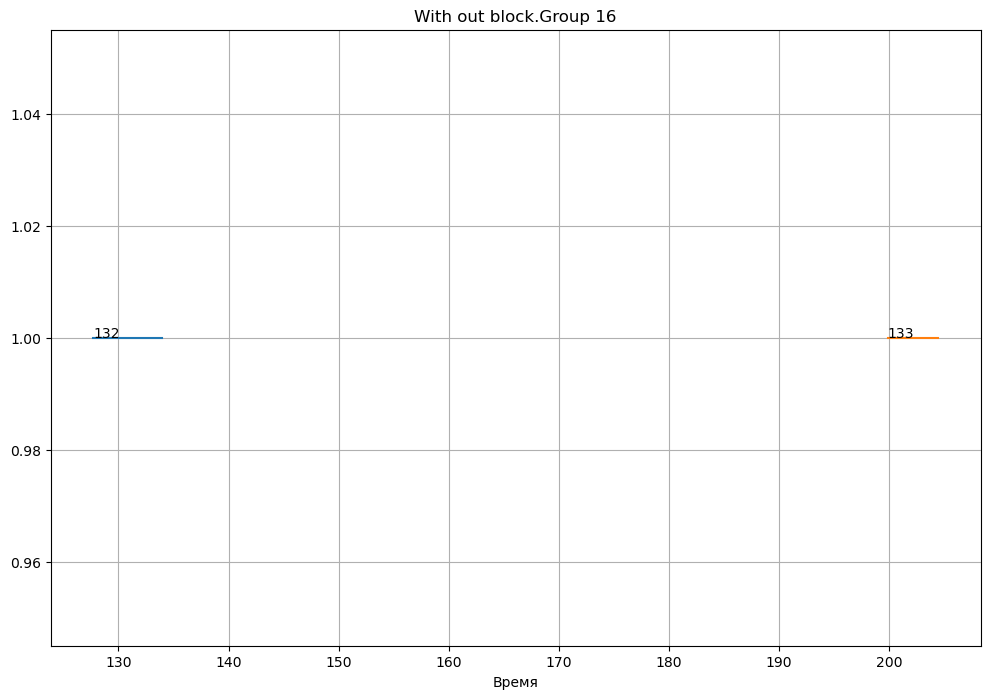

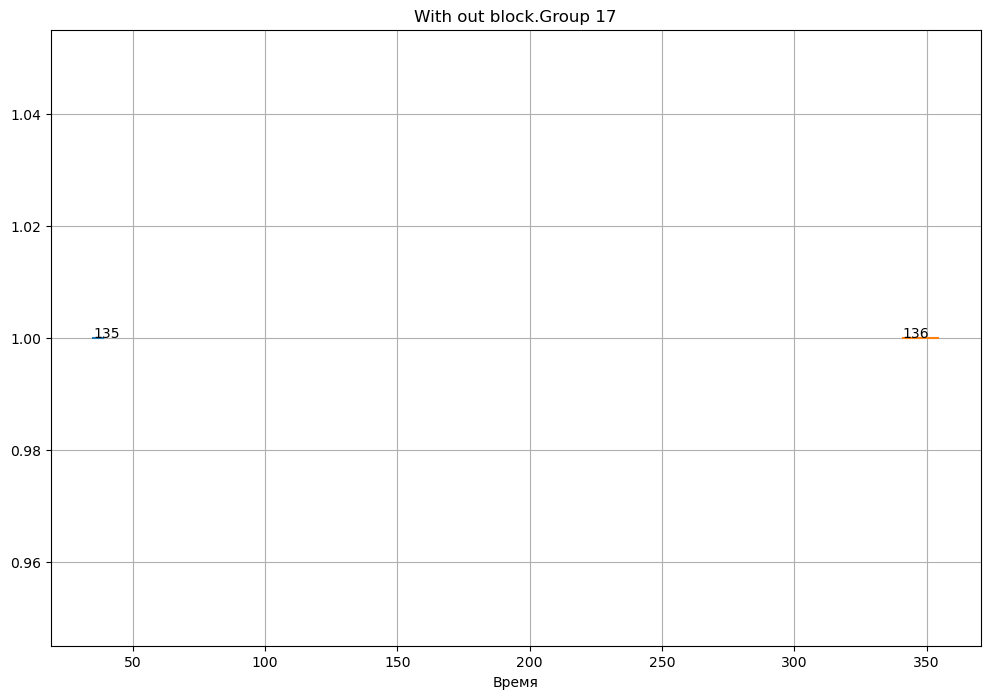

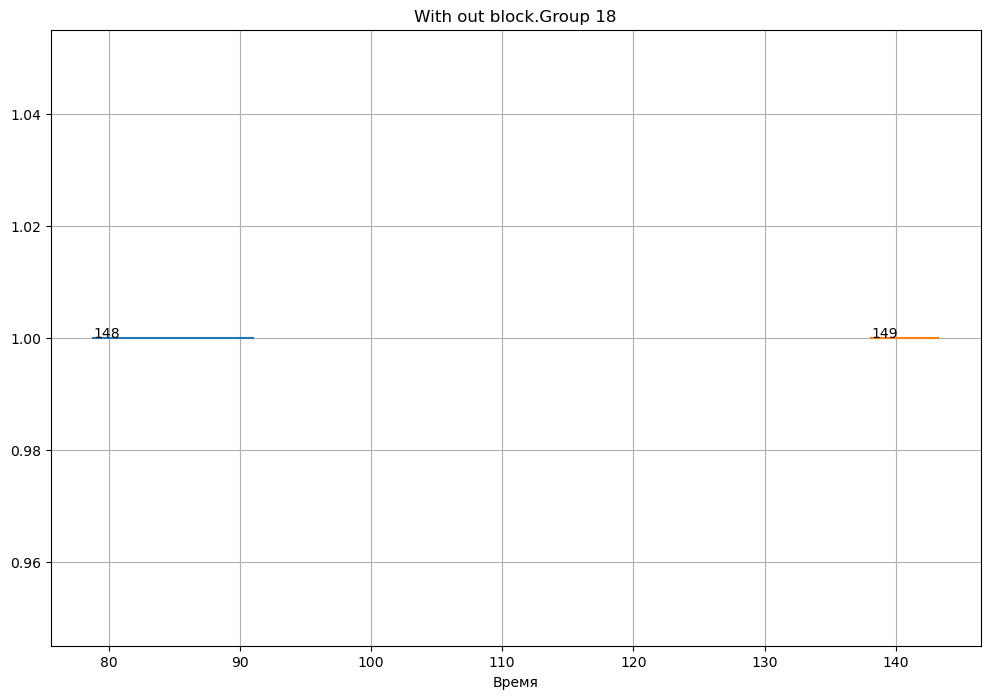

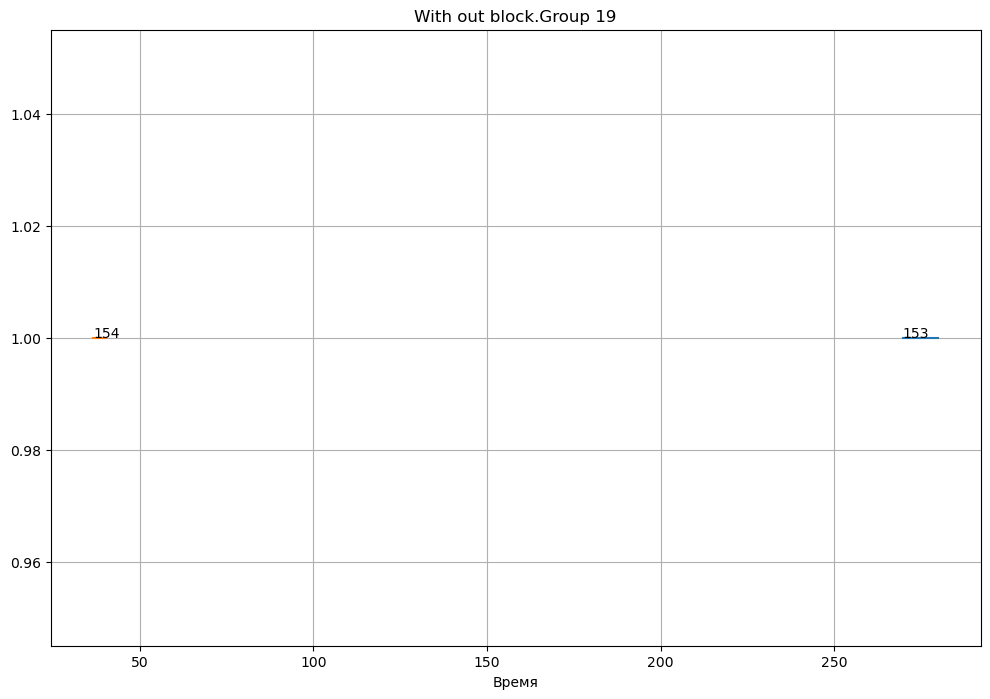

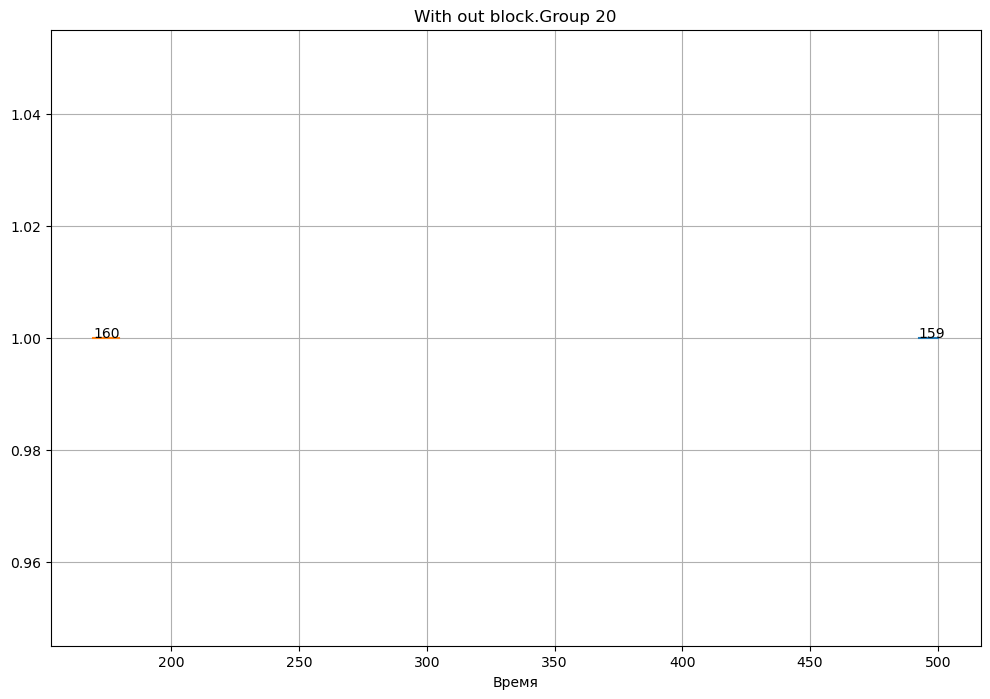

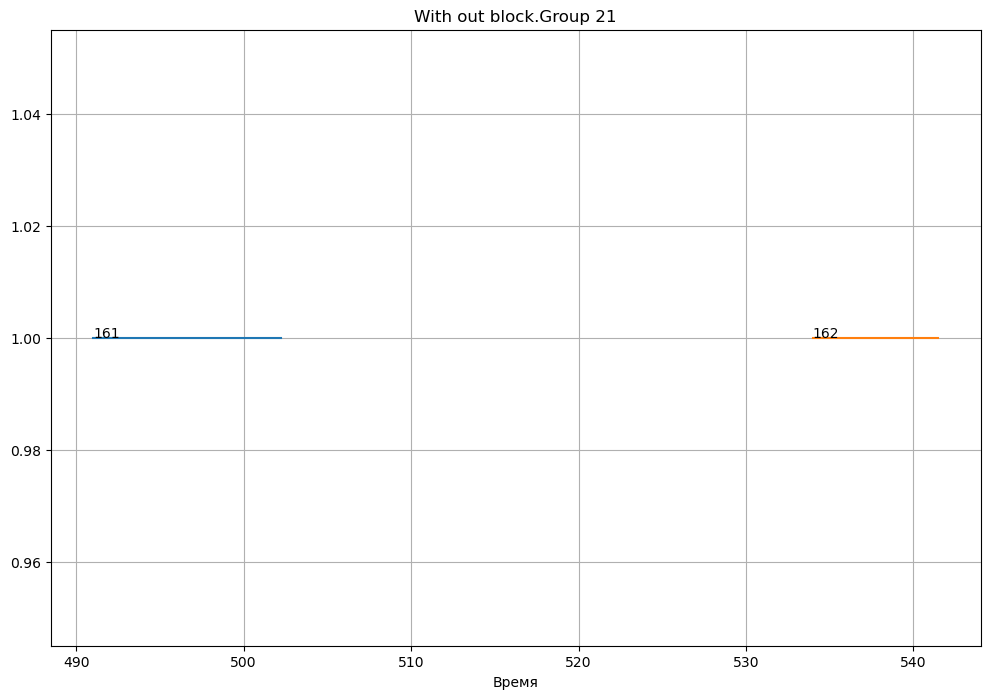

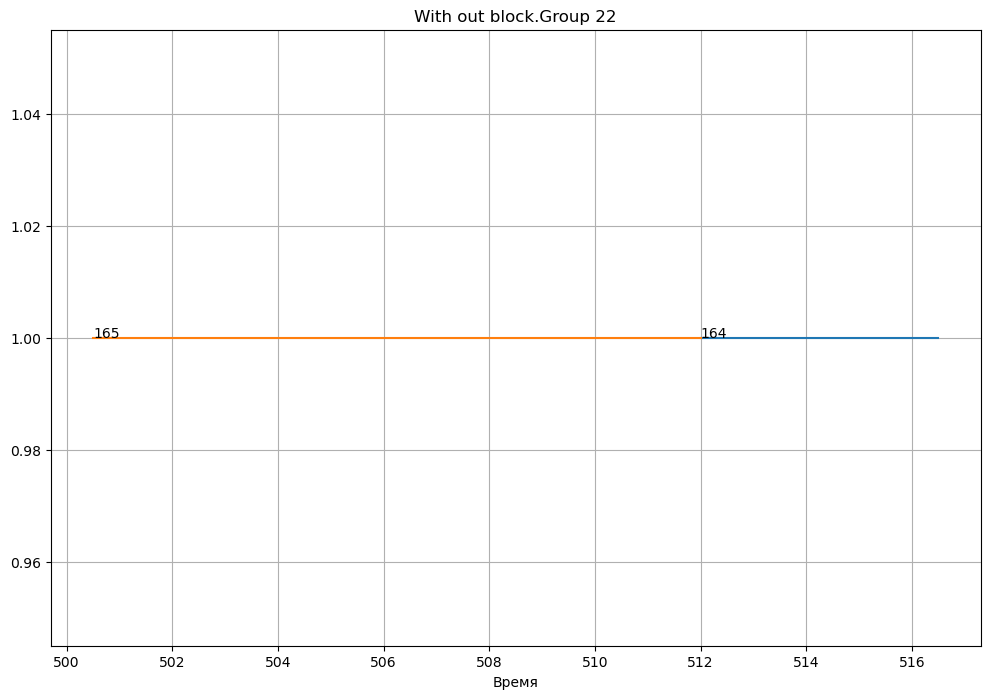

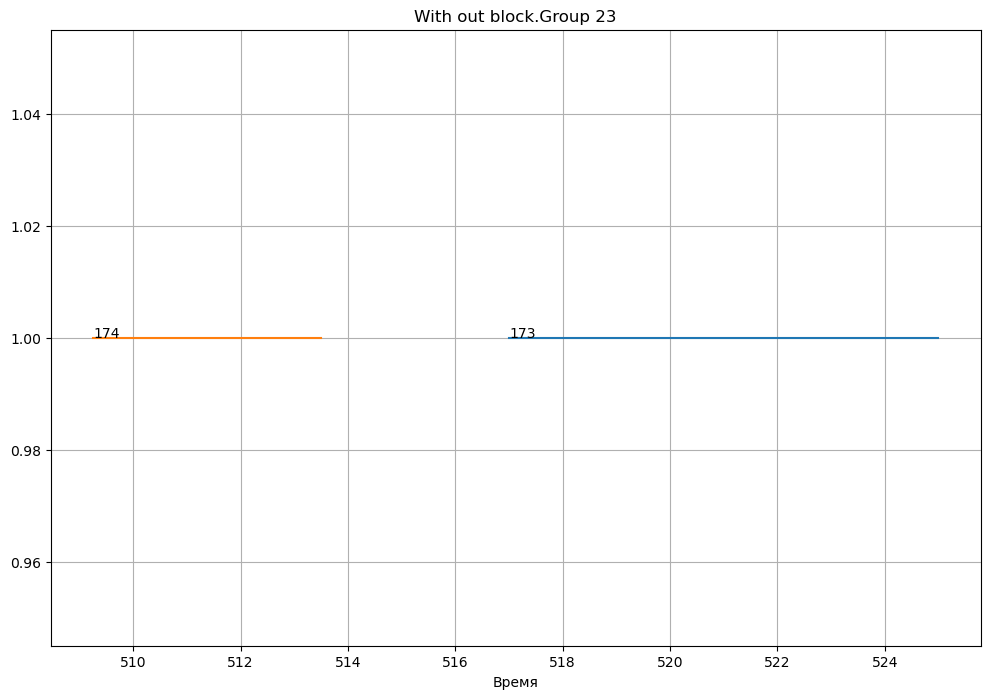

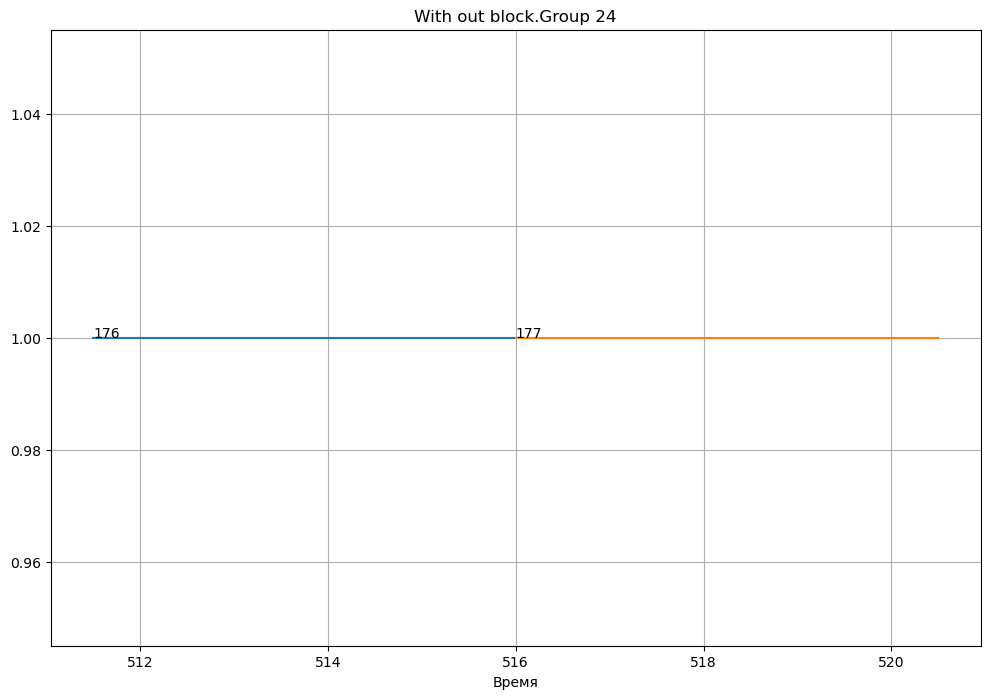

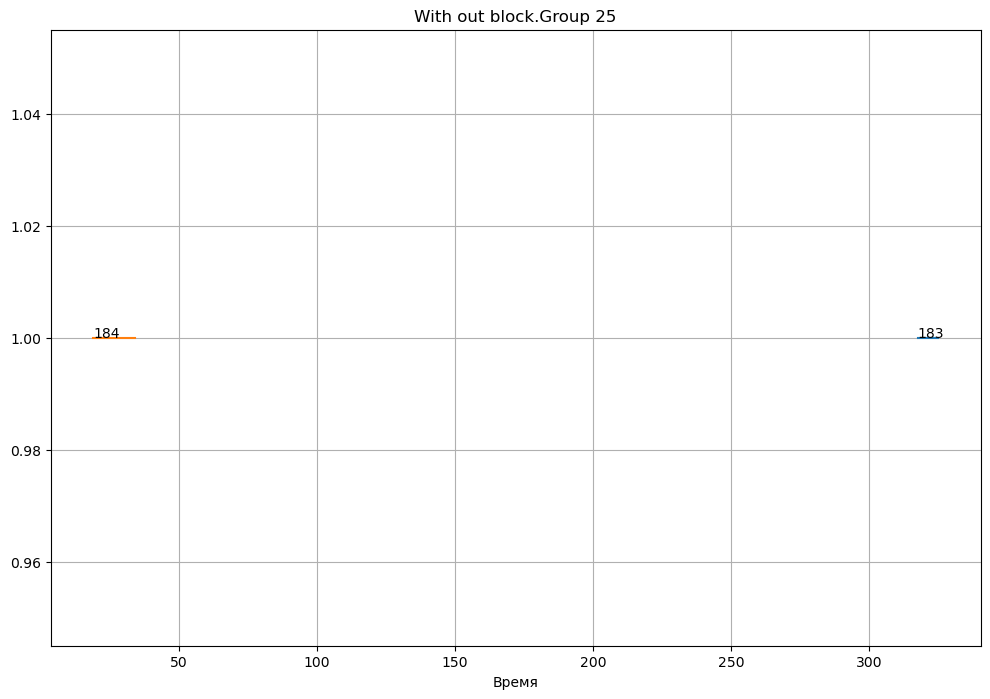

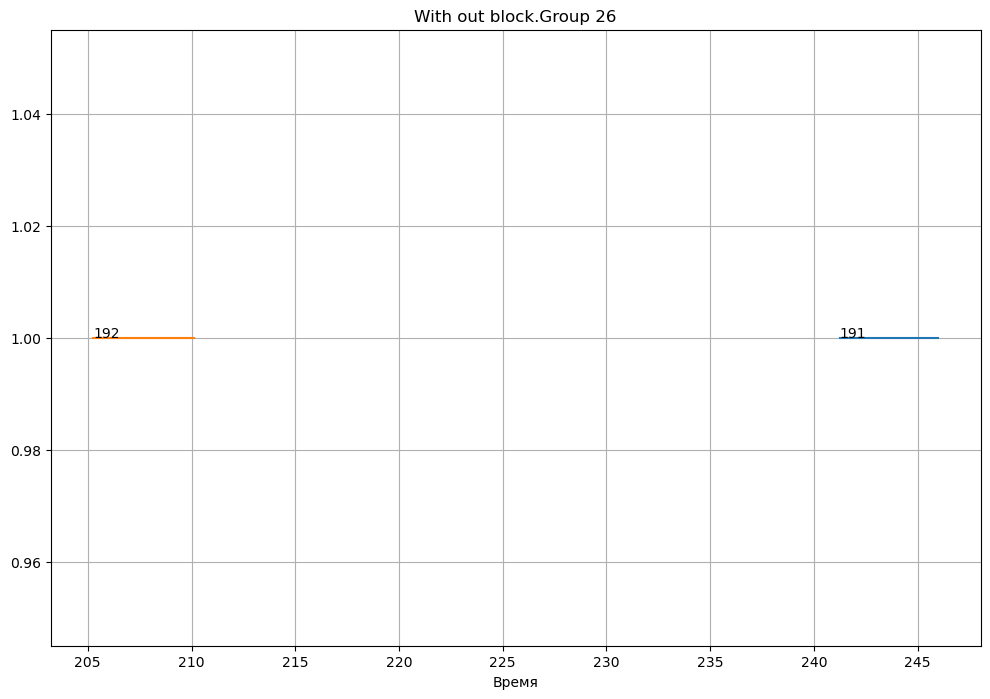

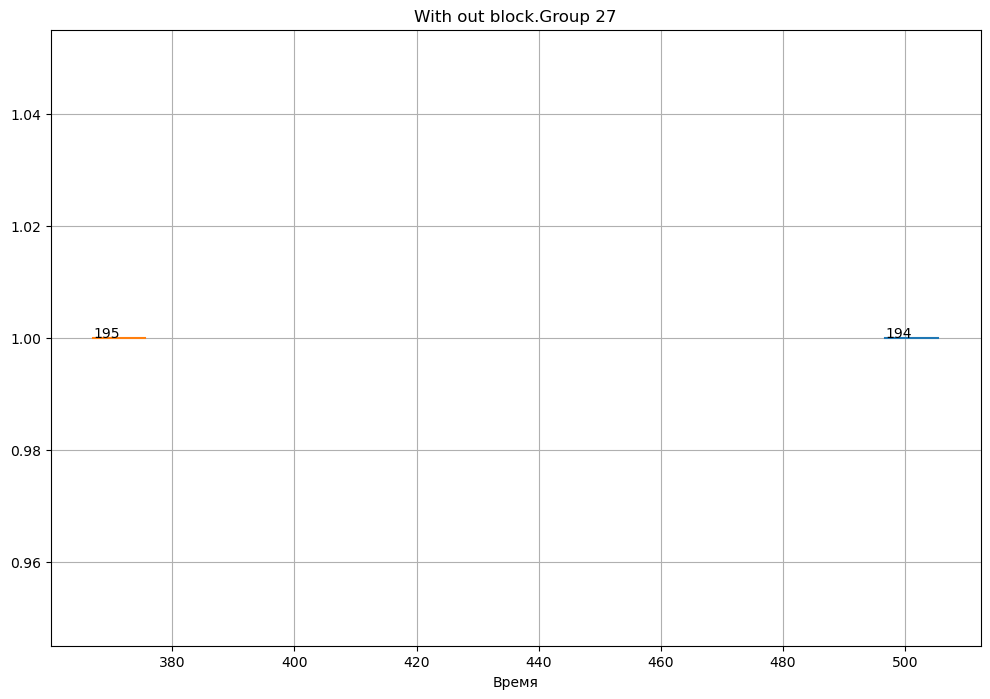

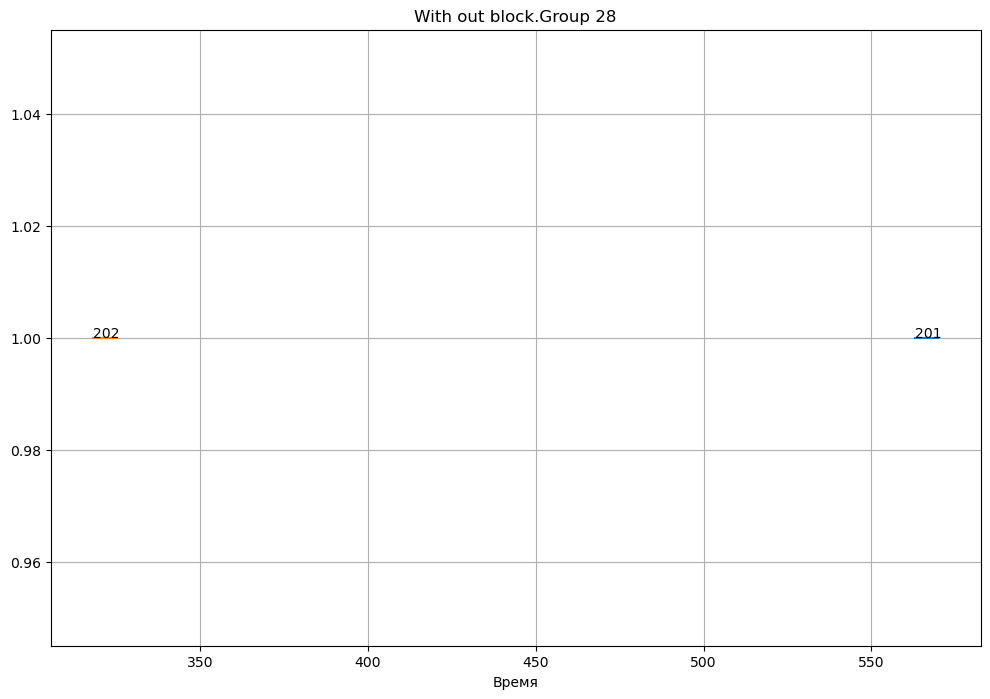

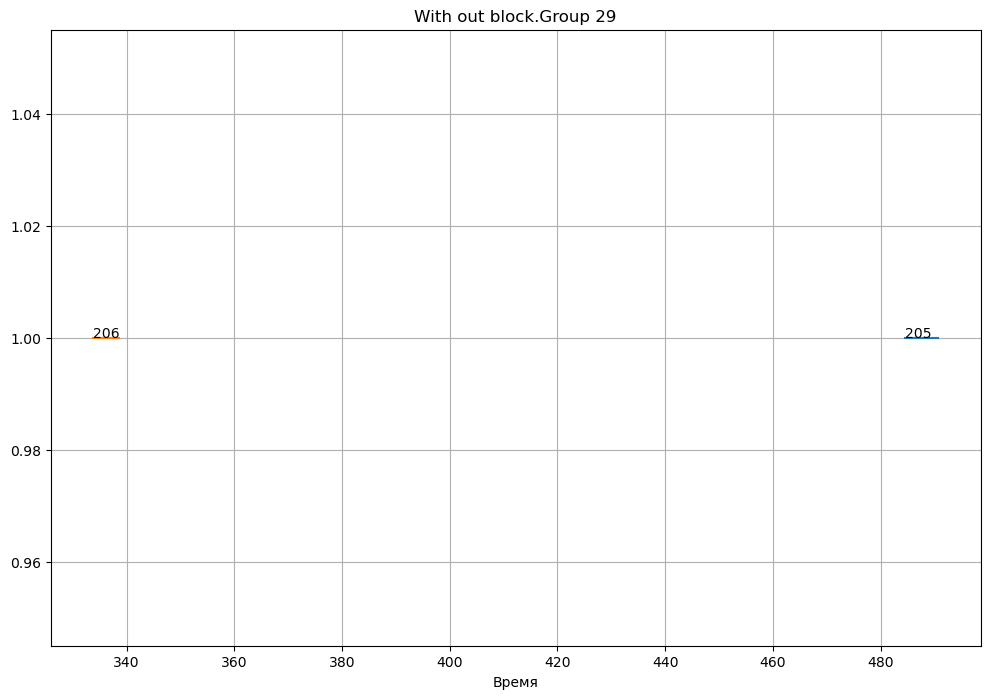

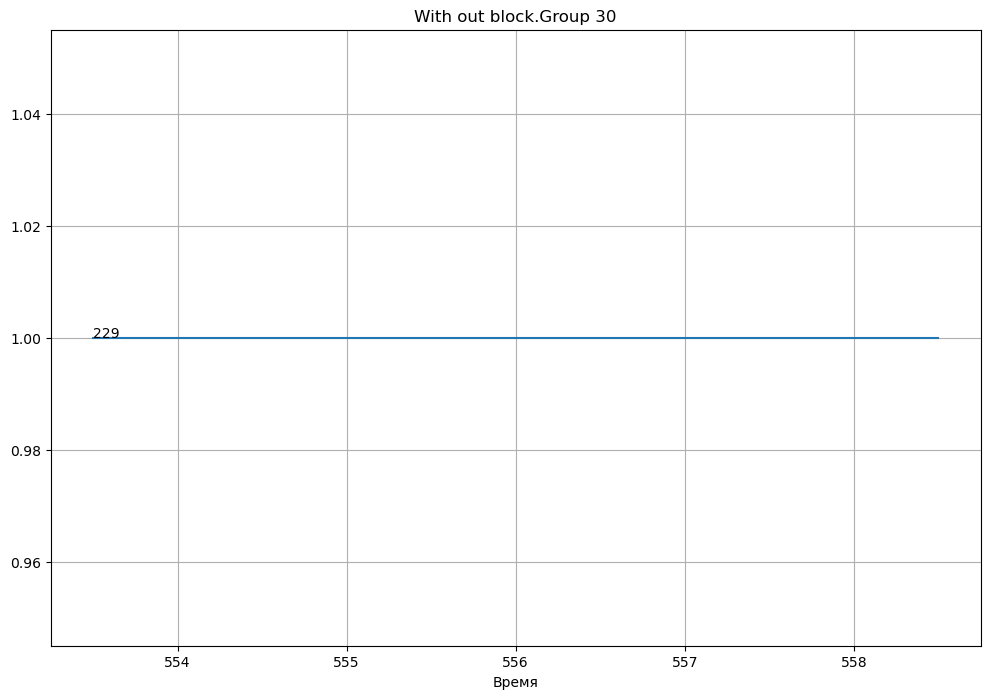

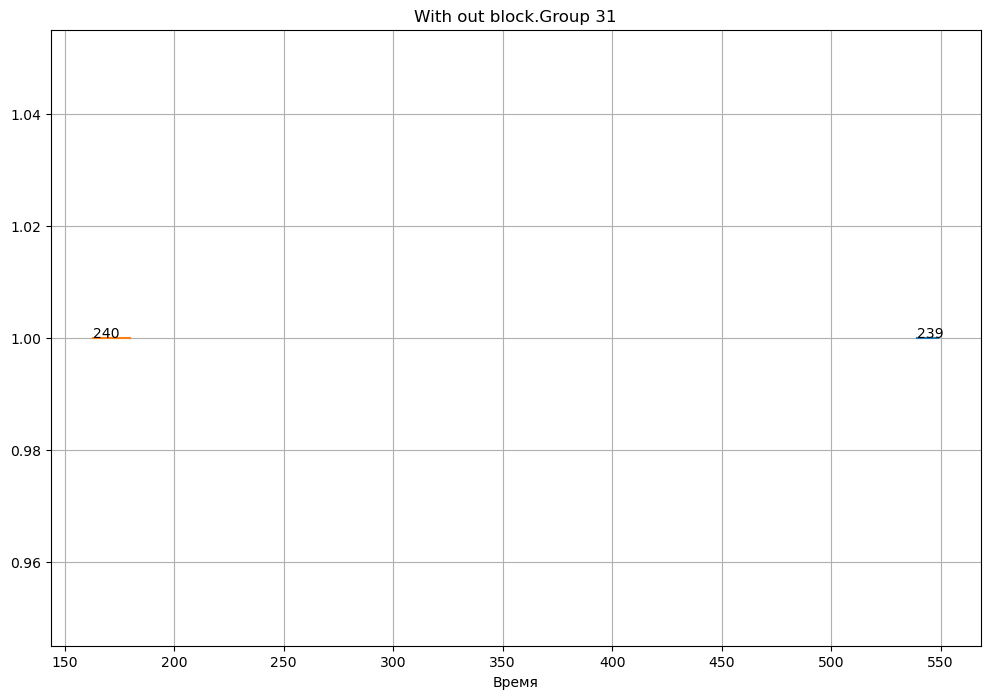

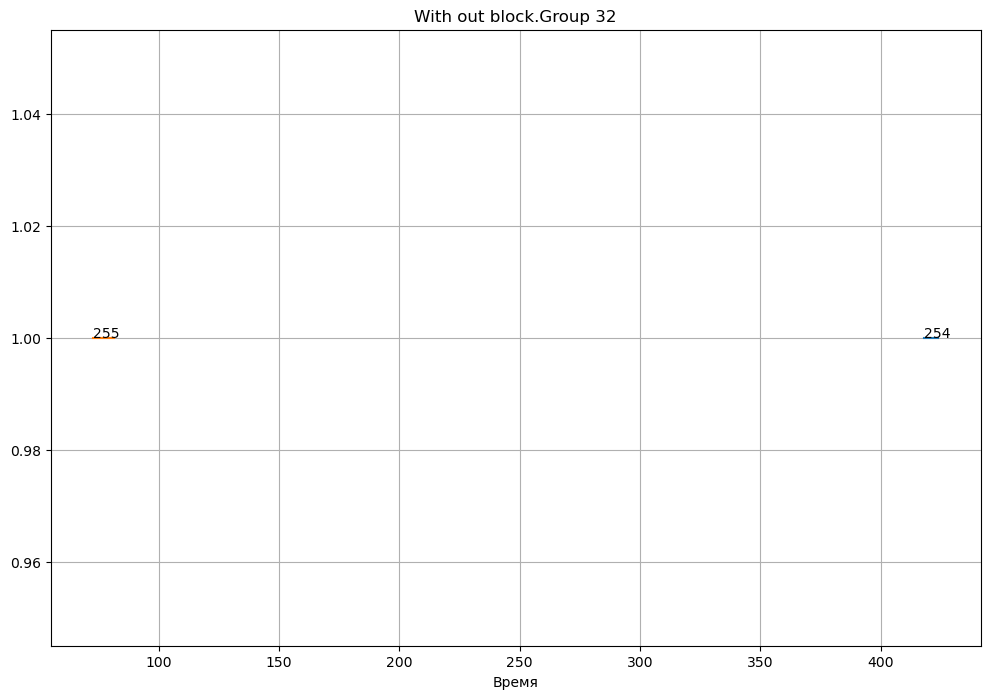

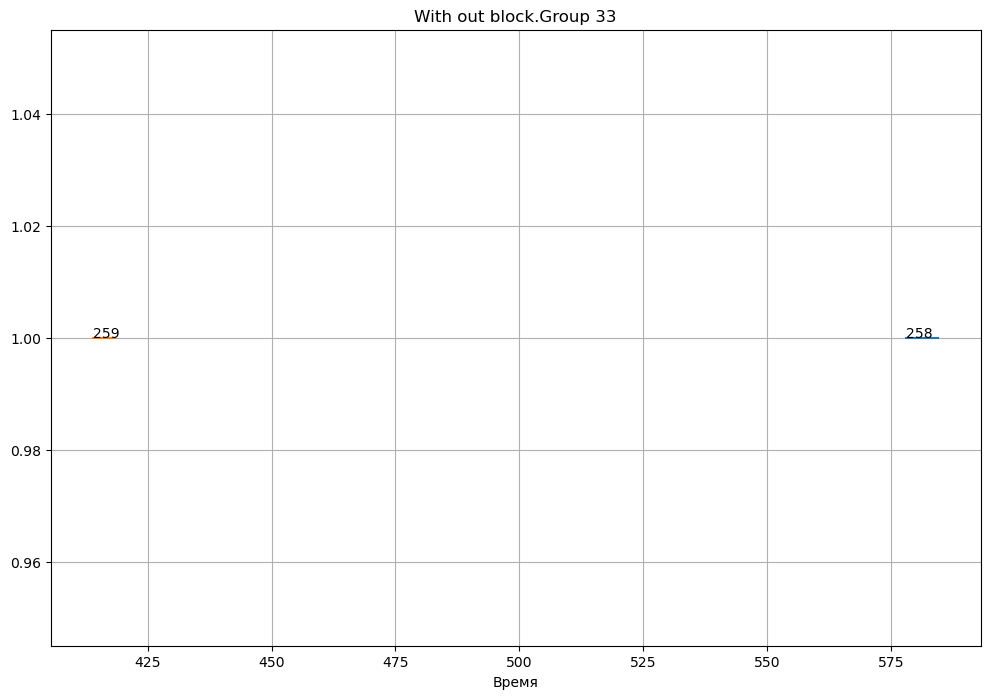

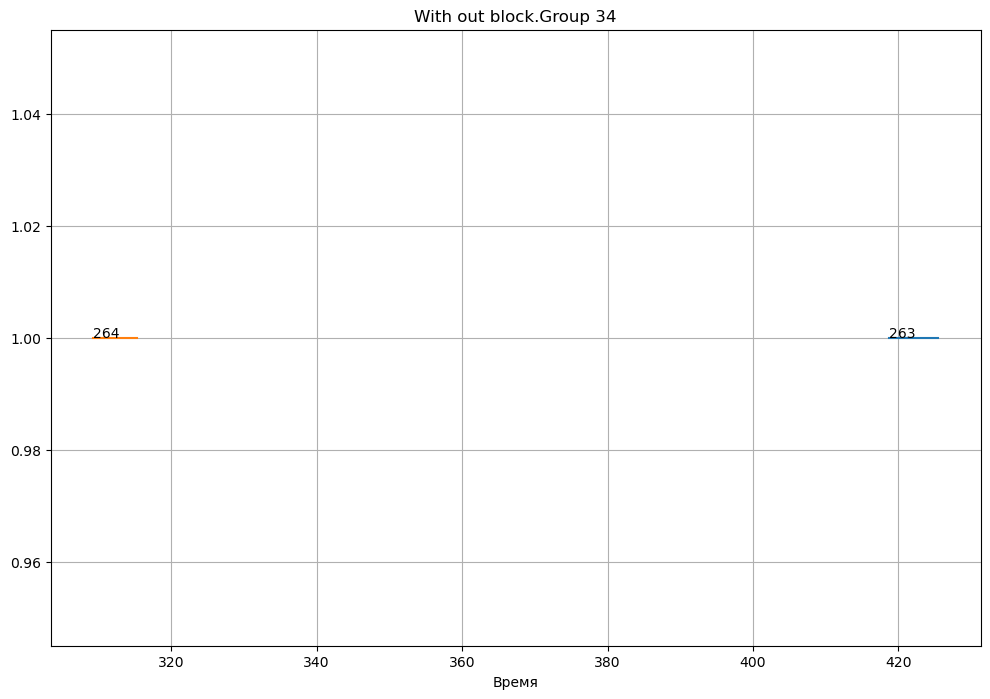

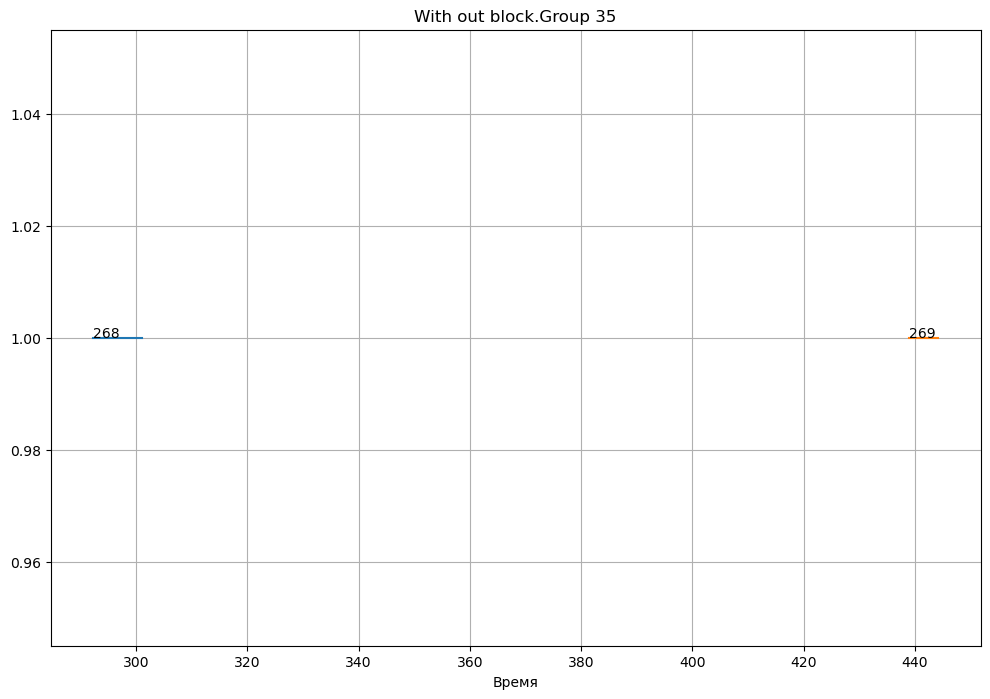

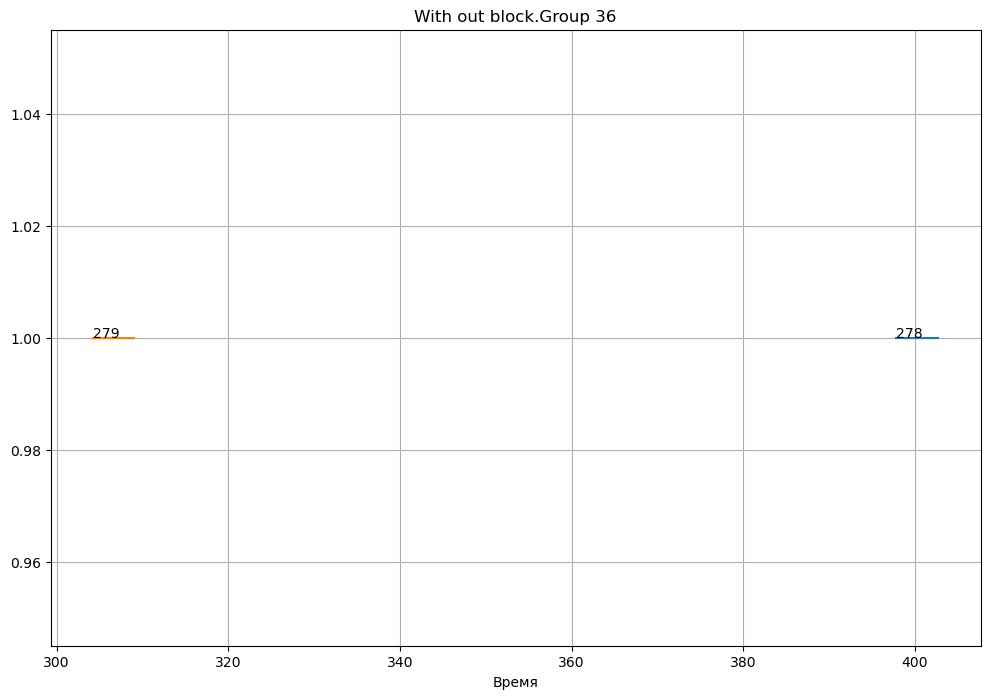

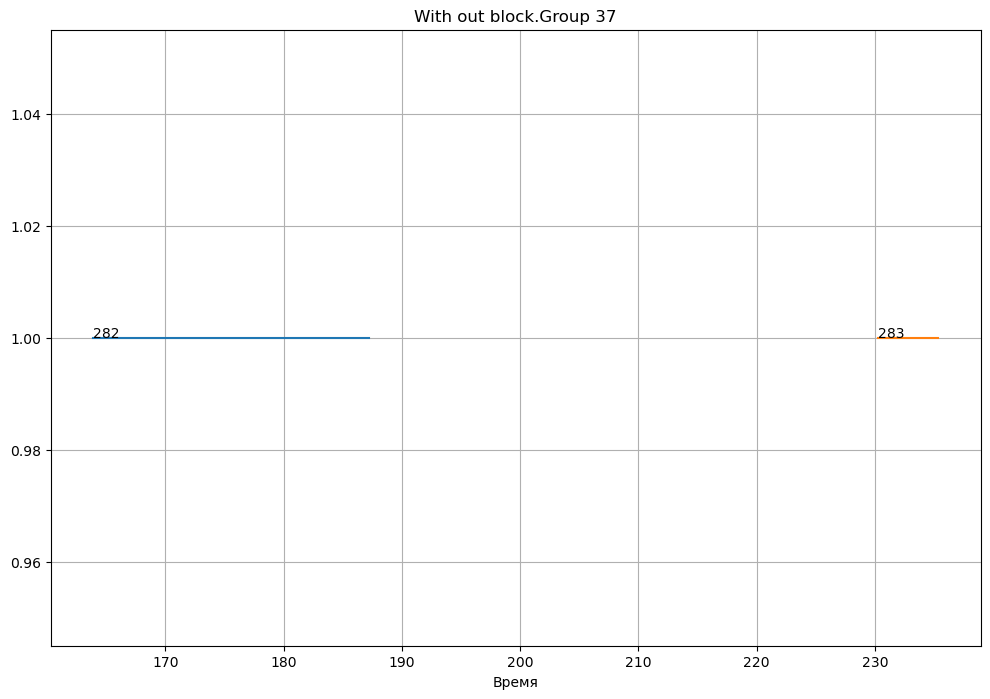

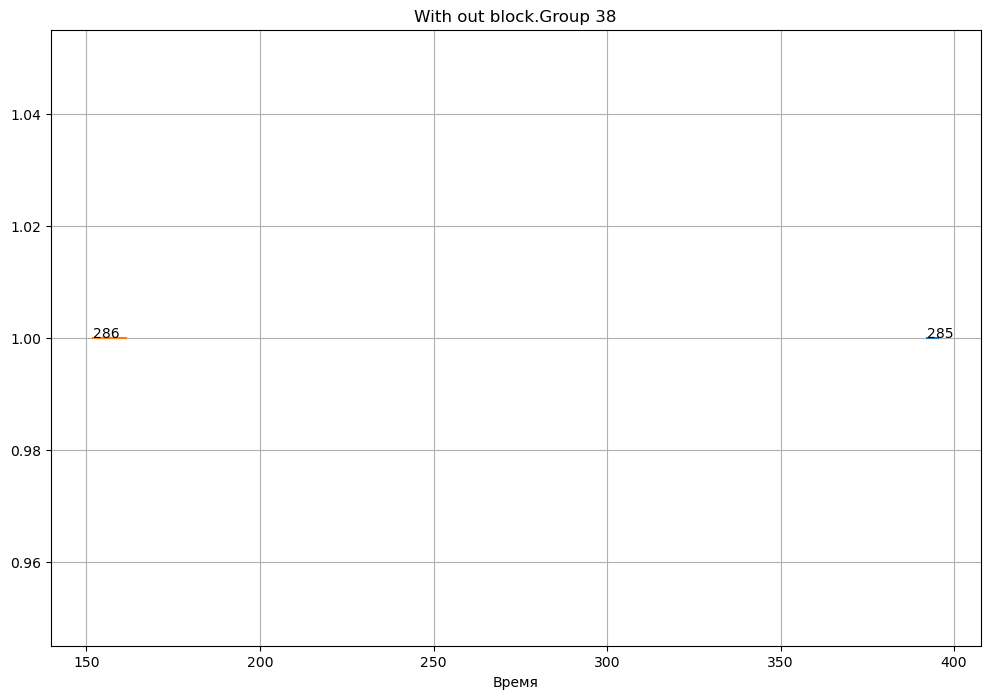

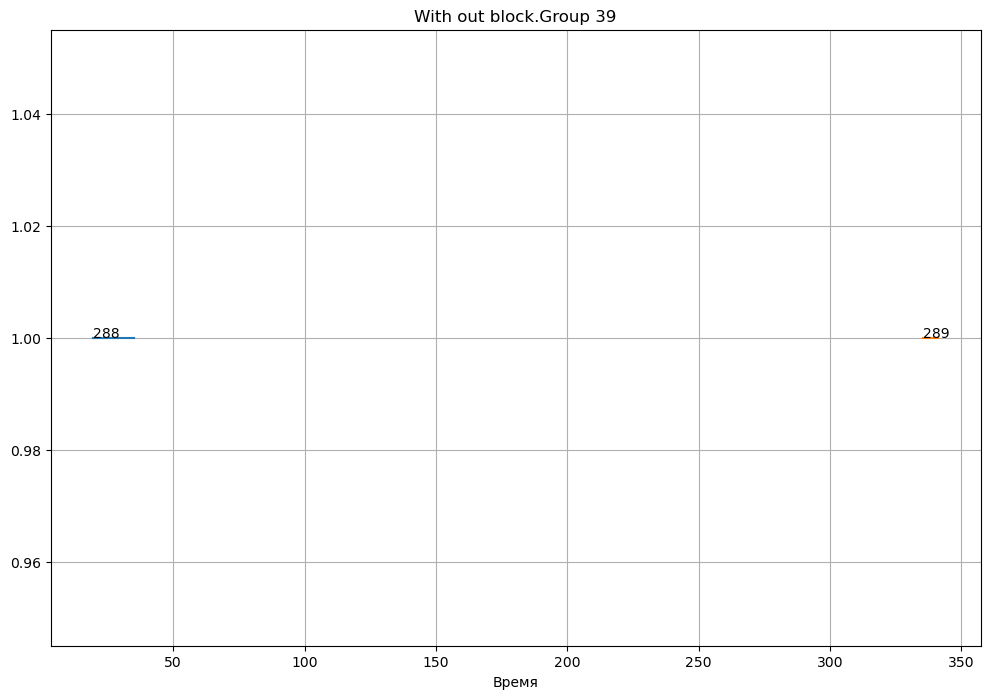

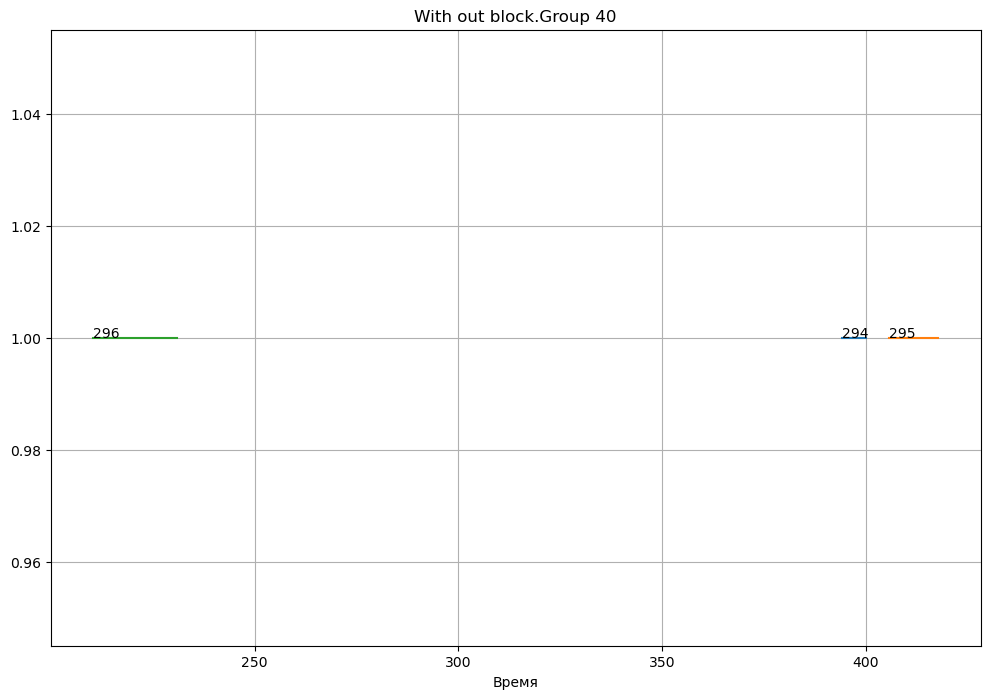

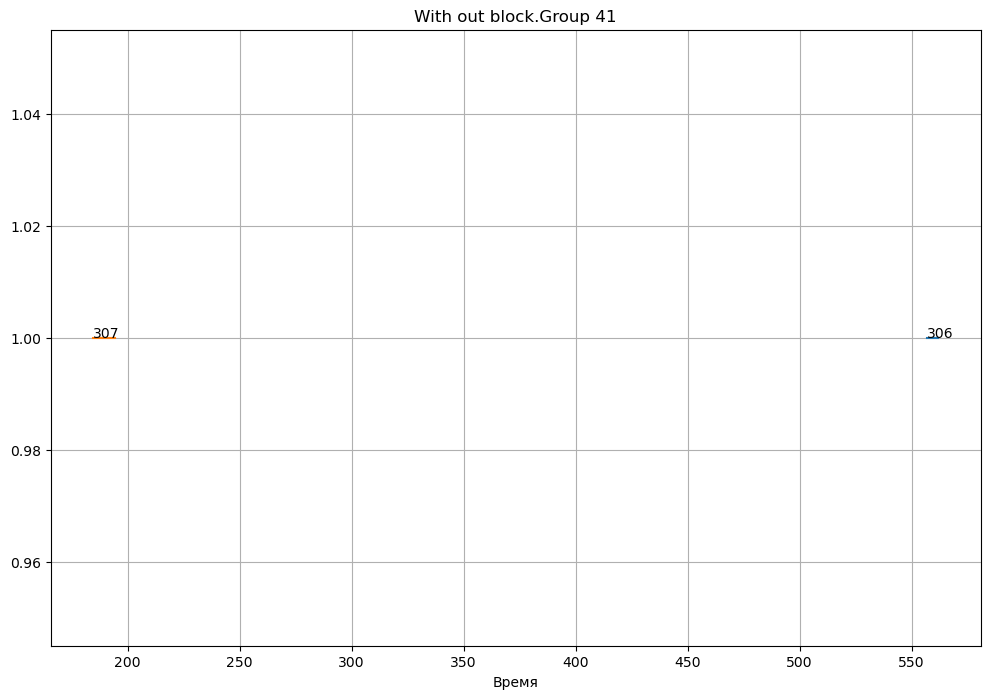

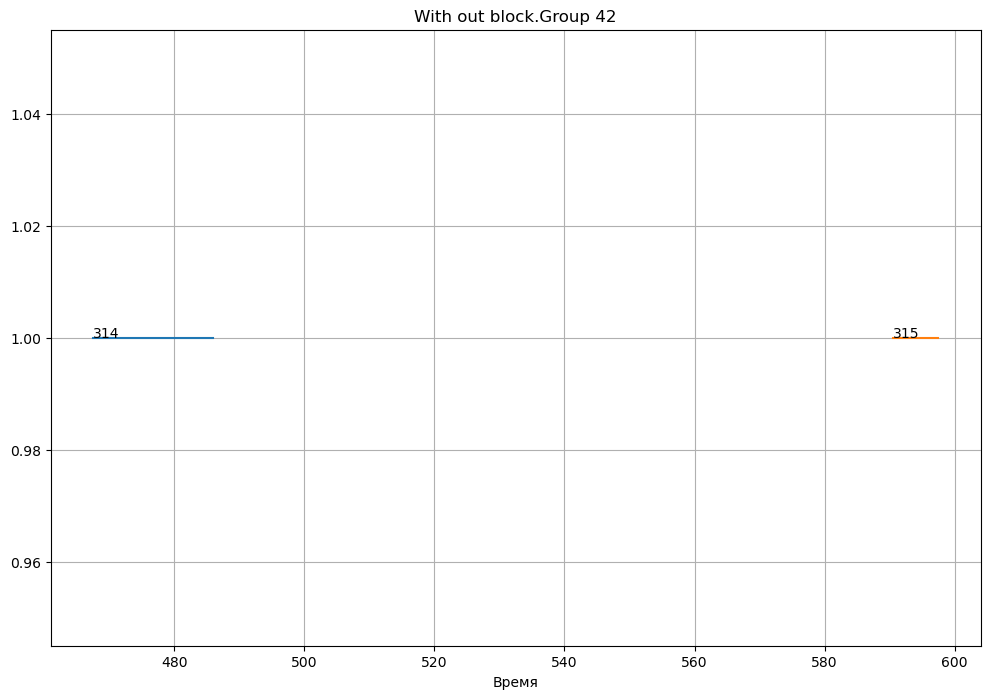

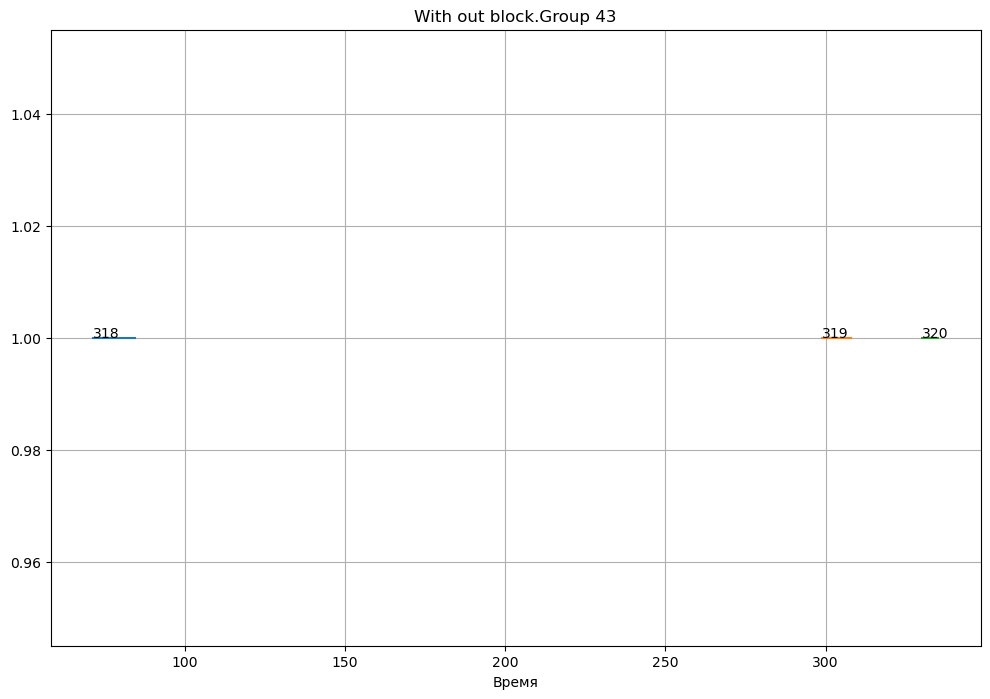

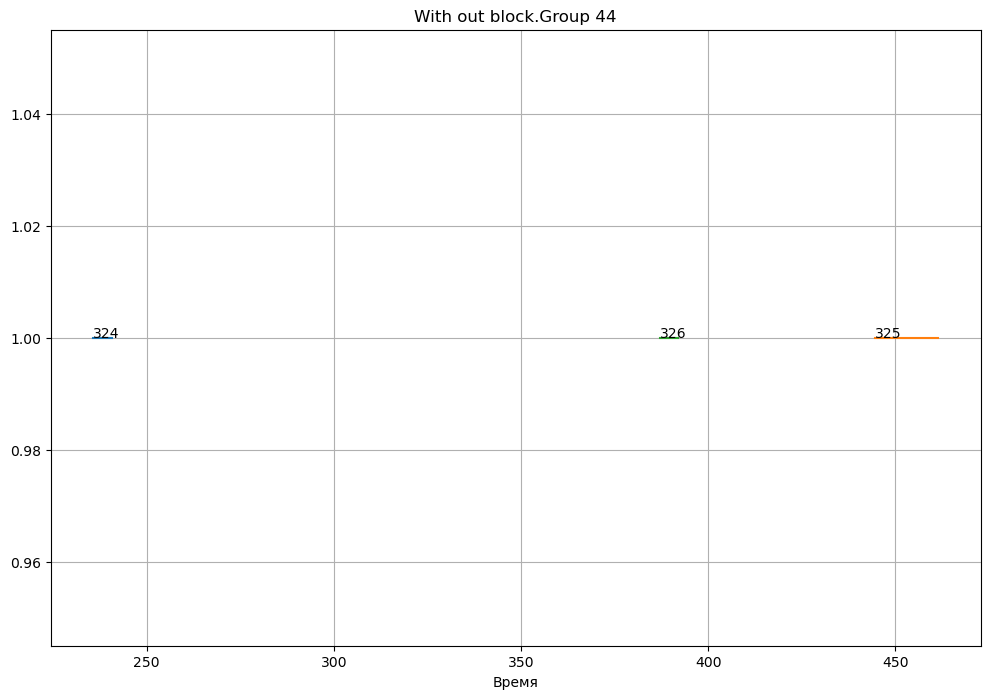

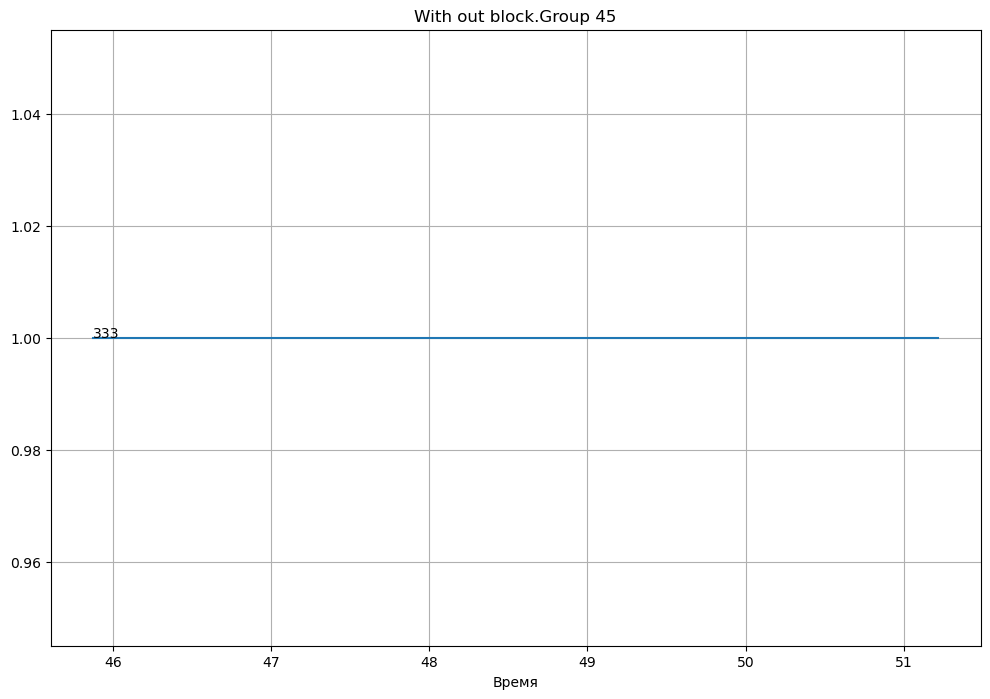

In [27]:
for k in wsch.prohib_dict.keys():
    plt.figure(figsize=(12,8))
    #x=[]
    #y=[]
    for i in wsch.prohib_dict[k]:
        try:
            t1=wsch.debit_functions[i].t1
            t2=wsch.debit_functions[i].t2
            plt.plot([t1,t2],[1,1])
            plt.annotate(str(i),(t1,1))
        except KeyError:
            print()
            
    plt.title('With out block.Group '+str(k))
    plt.xlabel('Время')
    plt.grid(True)
    #plt.savefig(path+'group '+str(k)+'.png')
    plt.show()

In [184]:
pairs=[]
for j in np.arange(R_.shape[1]):
    for i in np.arange(R_.shape[0]):
        r=R_[i,j]
        if r>=0:
            fun=wsch.debit_functions[r]
            t1=fun.t1
            t2=fun.t2
            prohibits=fun.prohibits
            for w in prohibits:
                try:
                    wfun=wsch.debit_functions[w]
                    wt1=wfun.t1
                    wt2=wfun.t2
                    isp=op.interseption(np.array([t1,t2]),np.array([wt1,wt2]),shape=2)
                    if isp.shape[0]>0:
                        if isp[1]-isp[0]>0:
                            pairs.append((r,w))
                except KeyError:
                    continue
            


In [179]:
permittions=[]
for j in np.arange(R_.shape[1]):
    for i in np.arange(R_.shape[0]):
        r=R_[i,j]
        if r>=0:
            if not wsch.ftmatrix[r,j]:
                permittions.append((i,j))
        

Алгоритм с переменным расписанием  


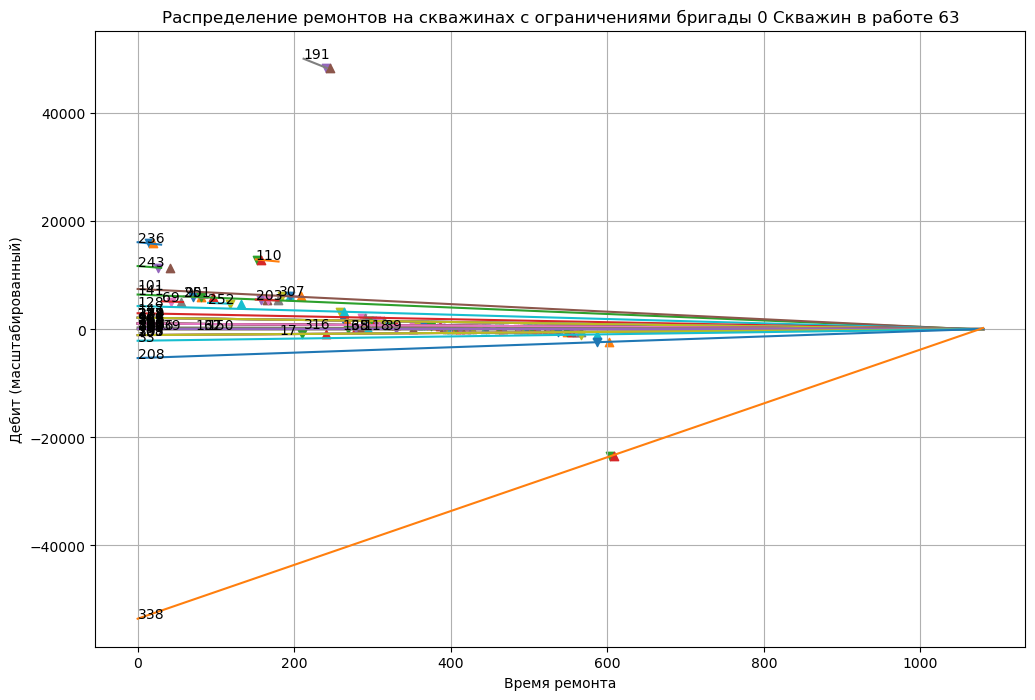

sum 0
d1 0.875 d2 151.0 w 59 next 232


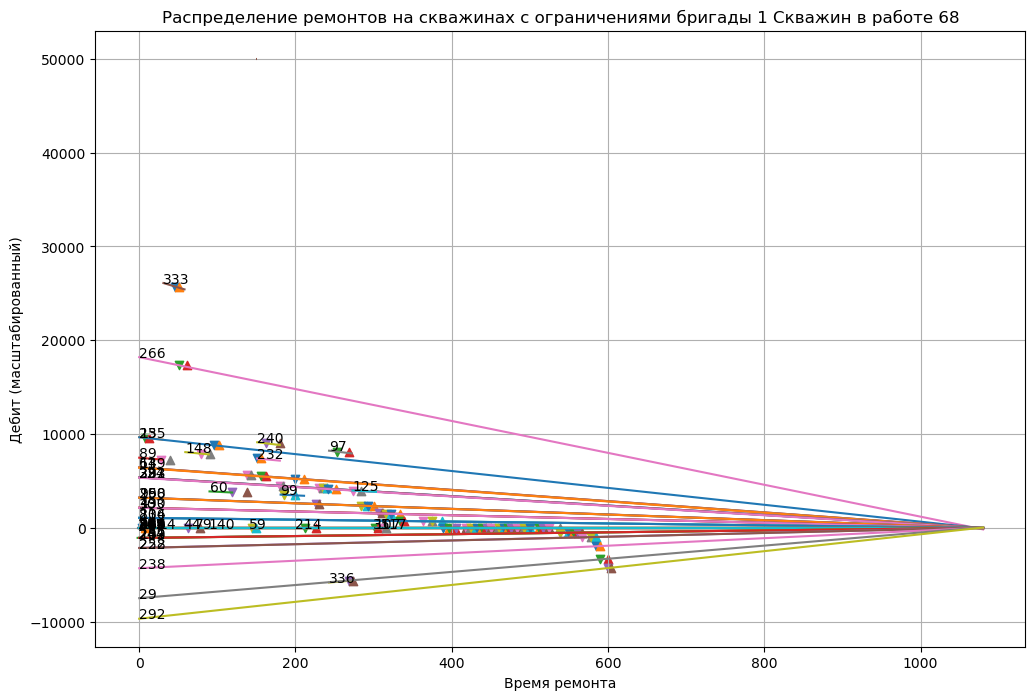

sum 0.875
d1 0.375 d2 152.0 w 129 next 13
d1 1.125 d2 181.0 w 160 next 156
d1 1.875 d2 193.0 w 156 next 53


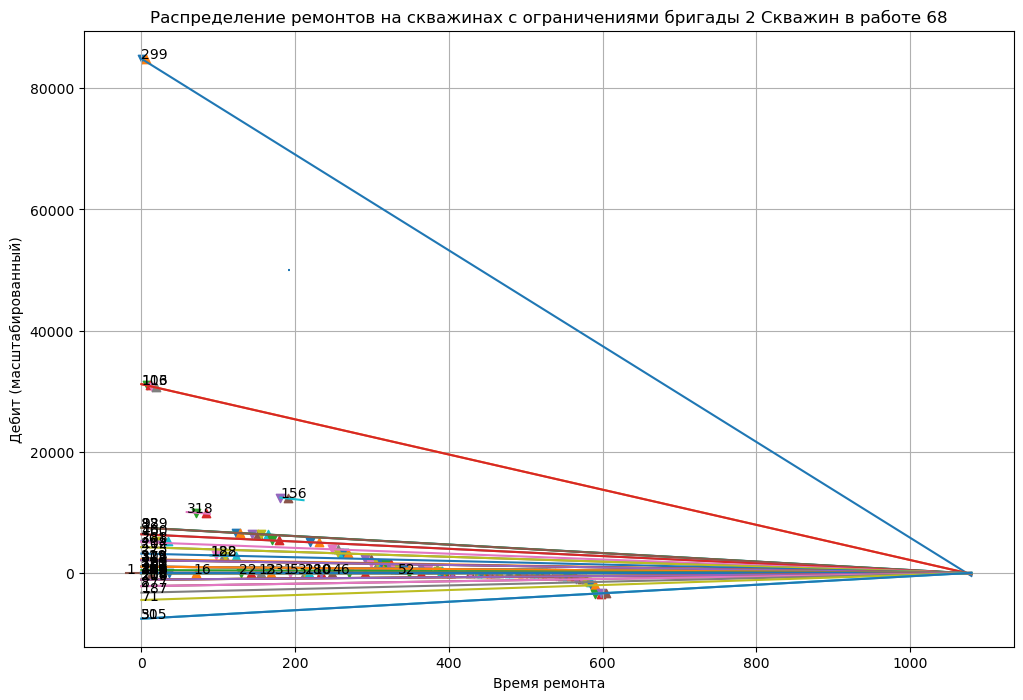

sum 4.25
d1 0.5625 d2 59.0 w 36 next 185


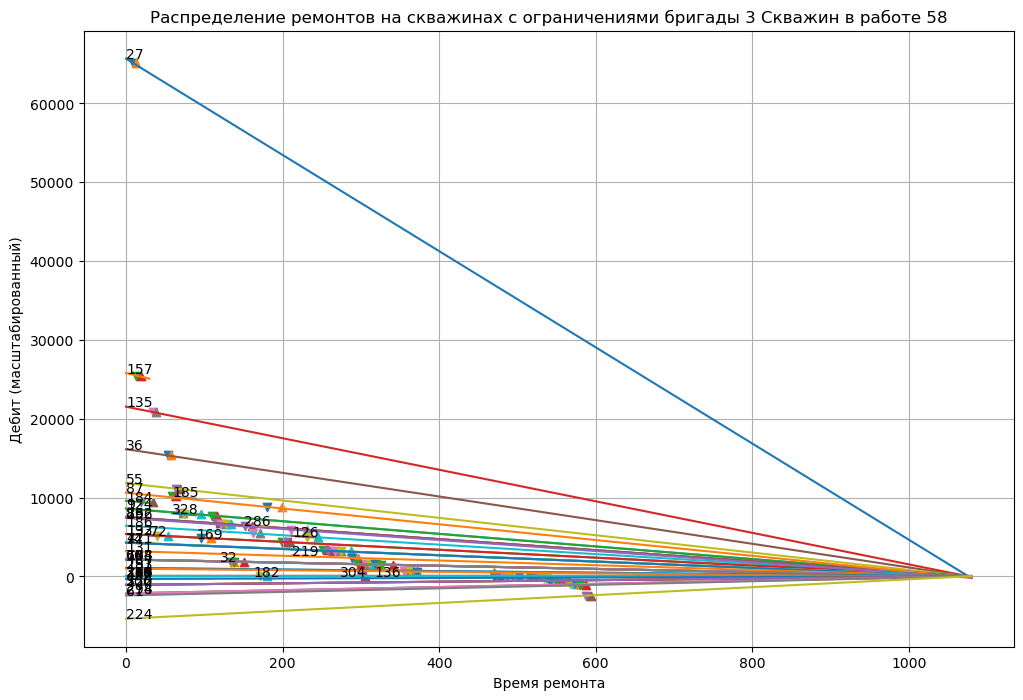

sum 4.8125
d1 0.25 d2 144.0 w 227 next 23


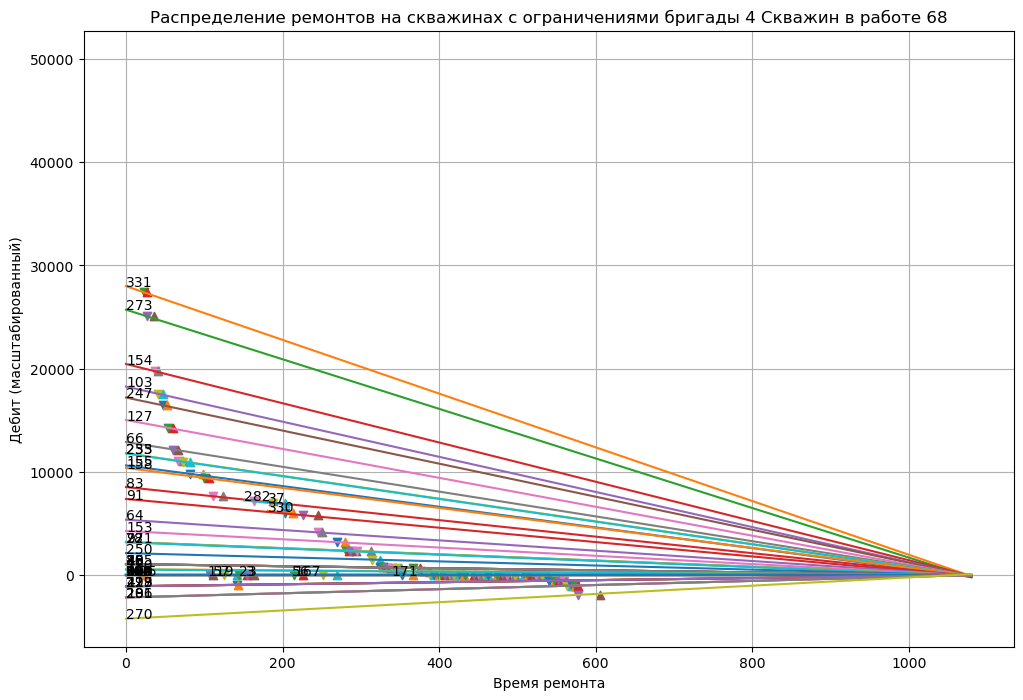

sum 5.0625


In [19]:
#R_=R
#=D
#T_=T
print("Алгоритм с переменным расписанием  ")
gamma=100
gdelta=0
#k=1
#mask=~np.isnan(D[:,k])
for k in np.arange(R_.shape[1]):
    plt.figure(figsize=(12,8))
    mask=R_[:,k]>=0
    count=mask[mask==True].shape[0]
    
#график интеграла функции дебита для каждой скважины
    for s,i in enumerate(R_[:,k]):
        #if i<0: 
            #break
        if i>0:
            order=O[s,k]
            fun=wsch.debit_functions[i]
            x=fun.supp
            t1_=D_[s,k]
            t2_=T_[s,k]
            supp1=np.nan
            if s<R_.shape[0]-1:
                target=R_[s+1,k]
                if target<0:
                    t3_=np.inf
                    ts_=np.inf
                else:
                    nfun=wsch.debit_functions[target]
                    t3_=D_[s+1,k]
                    ts_=ts1[R_[s,k],R_[s+1,k]]
                    if nfun.cs:
                        supp1=nfun.supp[0]
                        ndelta=supp1-(t2_+ts_)
            else:
                t3_=np.inf
                ts_=np.inf
            delta=osch.get_delta(t1_,t2_,t3_,ts=ts_,bound=wsch.debit_functions[R_[s,k]].supp[1])
            #if delta<0:
                #print(s,i,t1_,t2_,t3_,ts_,wsch.debit_functions[R_[s,k]].supp[1])        
            y=[(wsch.f6(w,fun)) for w in x]
            t1=[(wsch.f6(w,fun)) for w in [D_[:,k][s]] if ~np.isnan(w)]
            t2=[(wsch.f6(w,fun)) for w in [T_[:,k][s]] if ~np.isnan(w)]
            plt.plot(x,y)
            tilda=(wsch.f6(t1_,fun))
            #plt.plot([t1_,t1_+delta],[tilda,tilda],linestyle='dashed')
            if ~np.isnan(supp1):
                tilda1=50000
                #tilda1=((wsch.f6(supp1,nfun))+(wsch.maxcs-wsch.mincs))*(1+np.exp(-gamma*(nfun.supp[1]-nfun.supp[0])**2))
                #tilda2=(wsch.f6(ndelta,nfun))
                if ndelta>0:
                    gdelta+=ndelta
                    plt.plot([t2_+ts_,supp1],[tilda1,tilda1],linestyle='dashed')
                    print('d1',ndelta,'d2',supp1,'w',i,'next',target)
                
            if len(t1)>0:
                plt.scatter(D_[:,k][s],t1,marker='v')
                plt.scatter(T_[:,k][s],t1,marker='^')
            plt.annotate(str(i),xy=(fun.supp[0],wsch.f6(fun.supp[0],fun)))
        
    #if np.fmod(i,2)==0:
        #plt.annotate(str(i),xy=(x[0],y[0]))
    #else:
        #plt.annotate(str(i),xy=(x[0],y[0]))
    plt.title('Распределение ремонтов на скважинах с ограничениями бригады '+str(k)+' Скважин в работе '+str(count))
    plt.xlabel('Время ремонта')
    plt.ylabel('Дебит (масштабированный)')    #обозначение номера скважины, для которой построена интегральная функция
    plt.grid(True)
    #plt.savefig(path+'distributions_group '+str(k)+'.png')
    plt.show()
    print('sum', str(gdelta))

Алгоритм с постоянным расписанием  
d1 1.09375 d2 59.0 w 69 next 185
d1 2.875 d2 90.0 w 318 next 169
d1 0.4375 d2 104.0 w 169 next 119
d1 0.625 d2 144.0 w 57 next 23
d1 3.75 d2 212.0 w 337 next 180


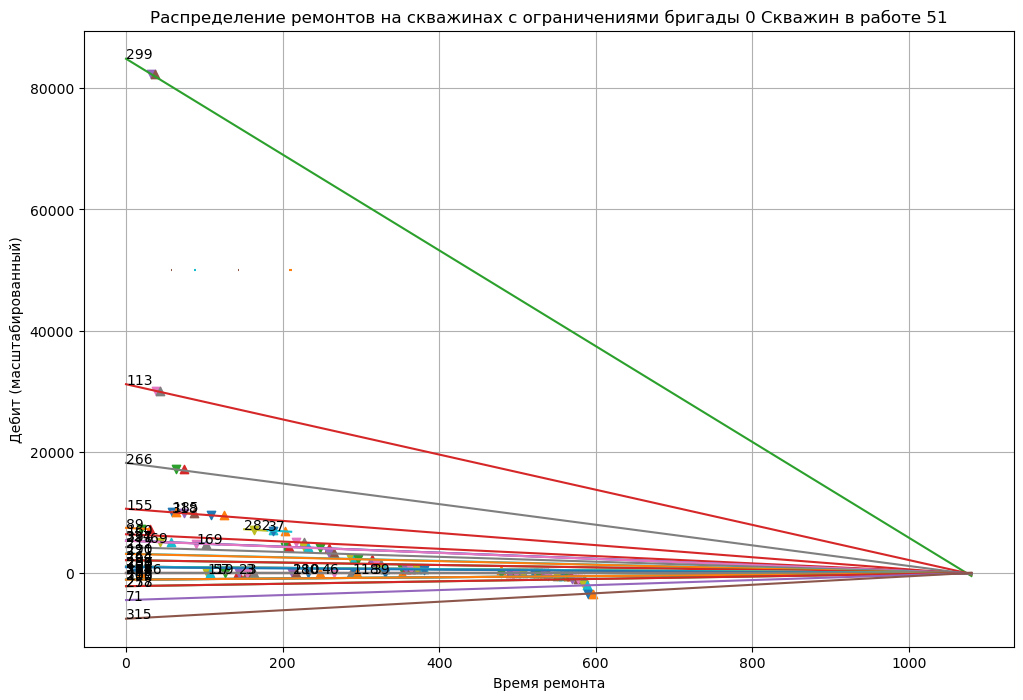

sum 8.78125
d1 2.0 d2 89.0 w 90 next 150
d1 0.375 d2 152.0 w 32 next 13


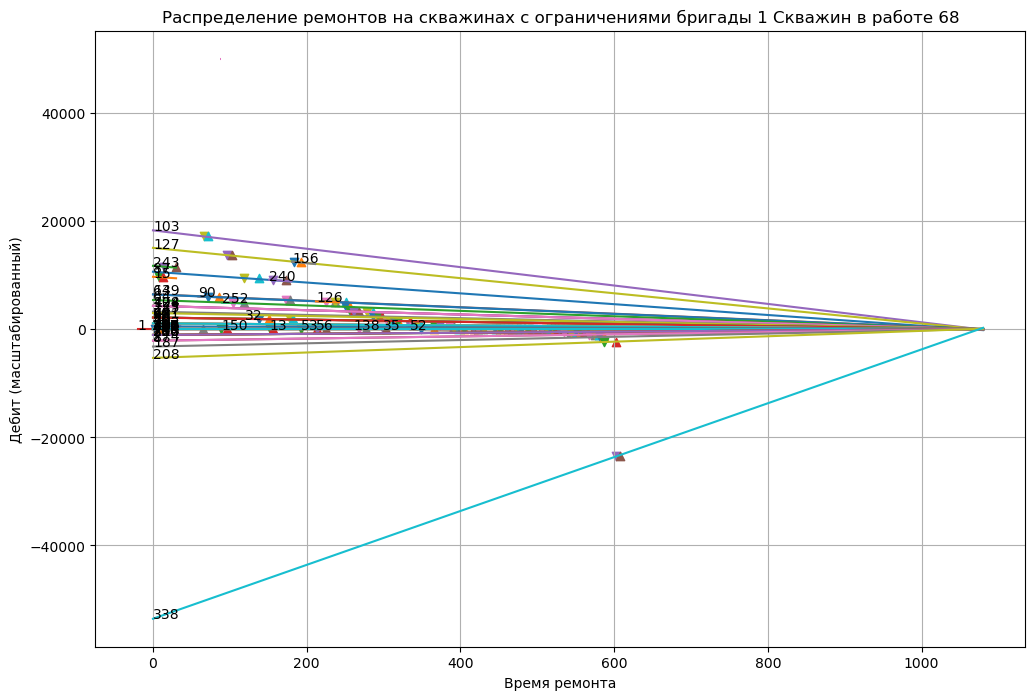

sum 11.15625
d1 1.34375 d2 57.0 w 72 next 44
d1 0.6875 d2 127.0 w 122 next 22


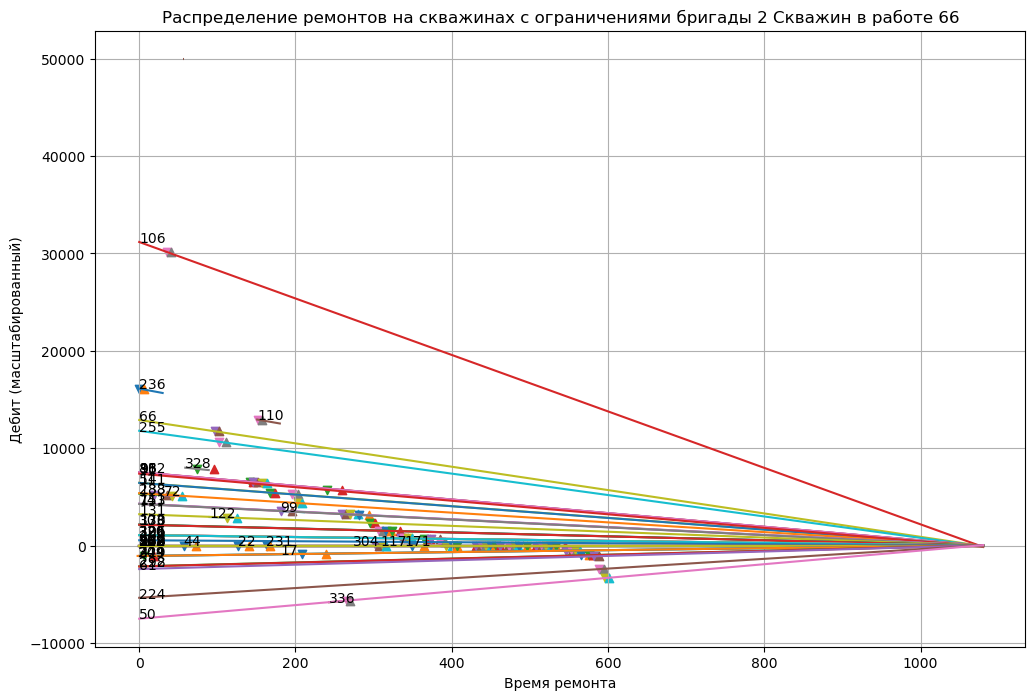

sum 13.1875
d1 0.59375 d2 59.0 w 227 next 251
d1 0.6875 d2 90.0 w 16 next 188
d1 0.5 d2 151.0 w 59 next 232
d1 3.125 d2 200.0 w 307 next 214


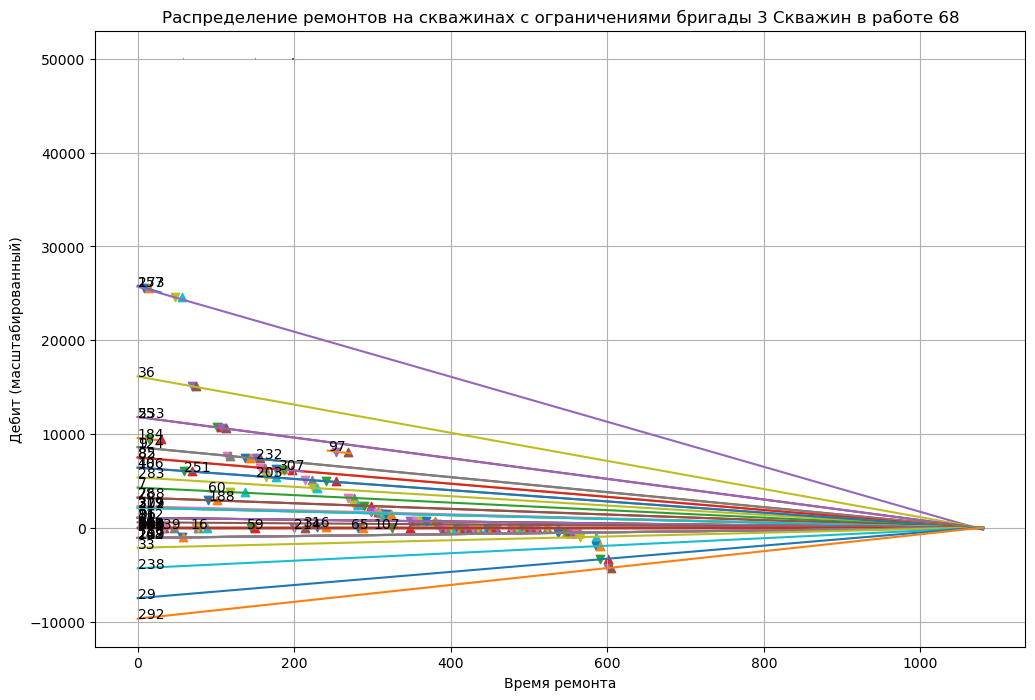

sum 18.09375
d1 1.046875 d2 25.0 w 146 next 14
d1 0.1875 d2 59.0 w 247 next 148
d1 0.625 d2 212.0 w 192 next 191


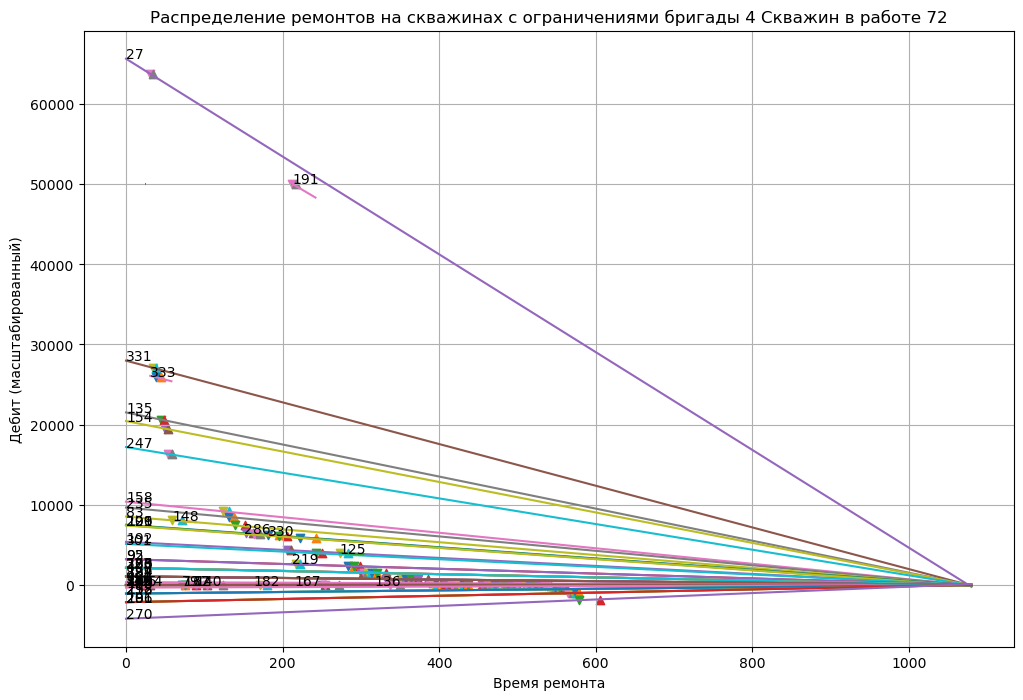

sum 19.953125


In [203]:
#R_=R
#=D
#T_=T
print("Алгоритм с постоянным расписанием  ")
gamma=100
gdelta=0
#k=1
#mask=~np.isnan(D[:,k])
for k in np.arange(R_.shape[1]):
    plt.figure(figsize=(12,8))
    mask=R_[:,k]>=0
    count=mask[mask==True].shape[0]
    
#график интеграла функции дебита для каждой скважины
    for s,i in enumerate(R_[:,k]):
        #if i<0: 
            #break
        if i>0:
            order=O[s,k]
            fun=wsch.debit_functions[i]
            x=fun.supp
            t1_=D_[s,k]
            t2_=T_[s,k]
            supp1=np.nan
            if s<R_.shape[0]-1:
                target=R_[s+1,k]
                if target<0:
                    t3_=np.inf
                    ts_=np.inf
                else:
                    nfun=wsch.debit_functions[target]
                    t3_=D_[s+1,k]
                    ts_=ts1[R_[s,k],R_[s+1,k]]
                    if nfun.cs:
                        supp1=nfun.supp[0]
                        ndelta=supp1-(t2_+ts_)
            else:
                t3_=np.inf
                ts_=np.inf
            delta=osch.get_delta(t1_,t2_,t3_,ts=ts_,bound=wsch.debit_functions[R_[s,k]].supp[1])
            #if delta<0:
                #print(s,i,t1_,t2_,t3_,ts_,wsch.debit_functions[R_[s,k]].supp[1])        
            y=[(wsch.f6(w,fun)) for w in x]
            t1=[(wsch.f6(w,fun)) for w in [D_[:,k][s]] if ~np.isnan(w)]
            t2=[(wsch.f6(w,fun)) for w in [T_[:,k][s]] if ~np.isnan(w)]
            plt.plot(x,y)
            tilda=(wsch.f6(t1_,fun))
            #plt.plot([t1_,t1_+delta],[tilda,tilda],linestyle='dashed')
            if ~np.isnan(supp1):
                #tilda1=((wsch.f6(supp1,nfun))+(wsch.maxcs-wsch.mincs))*(1+np.exp(-gamma*(nfun.supp[1]-nfun.supp[0])**2))
                #tilda2=(wsch.f6(ndelta,nfun))
                tilda1=50000
                if ndelta>0:
                    gdelta+=ndelta
                    plt.plot([t2_+ts_,supp1],[tilda1,tilda1],linestyle='dashed')
                    print('d1',ndelta,'d2',supp1,'w',i,'next',target)
                
            if len(t1)>0:
                plt.scatter(D_[:,k][s],t1,marker='v')
                plt.scatter(T_[:,k][s],t1,marker='^')
            plt.annotate(str(i),xy=(fun.supp[0],wsch.f6(fun.supp[0],fun)))
        
    #if np.fmod(i,2)==0:
        #plt.annotate(str(i),xy=(x[0],y[0]))
    #else:
        #plt.annotate(str(i),xy=(x[0],y[0]))
    plt.title('Распределение ремонтов на скважинах с ограничениями бригады '+str(k)+' Скважин в работе '+str(count))
    plt.xlabel('Время ремонта')
    plt.ylabel('Дебит (масштабированный)')    #обозначение номера скважины, для которой построена интегральная функция
    plt.grid(True)
    #plt.savefig(path+'distributions_group '+str(k)+'.png')
    plt.show()
    print('sum',gdelta)

In [78]:
def symmetric(n,a=0,b=10):
    array=np.empty(shape=(n,n))
    i=0
    j=0
    k=n
    while i<n:
        j=i
        while j<k:
            x=np.random.random()*(b-a)+a
            array[j,i]=x
            array[i,j]=x
            j+=1
        i+=1
    return array
       
            

In [197]:
R_[:,2]

array([236, 244, 288,  72,  44, 328, 122,  22, 110, 231,   0,  99,  17,
       336, 304, 117, 171])

In [200]:
D_[:,2].max()

349.75

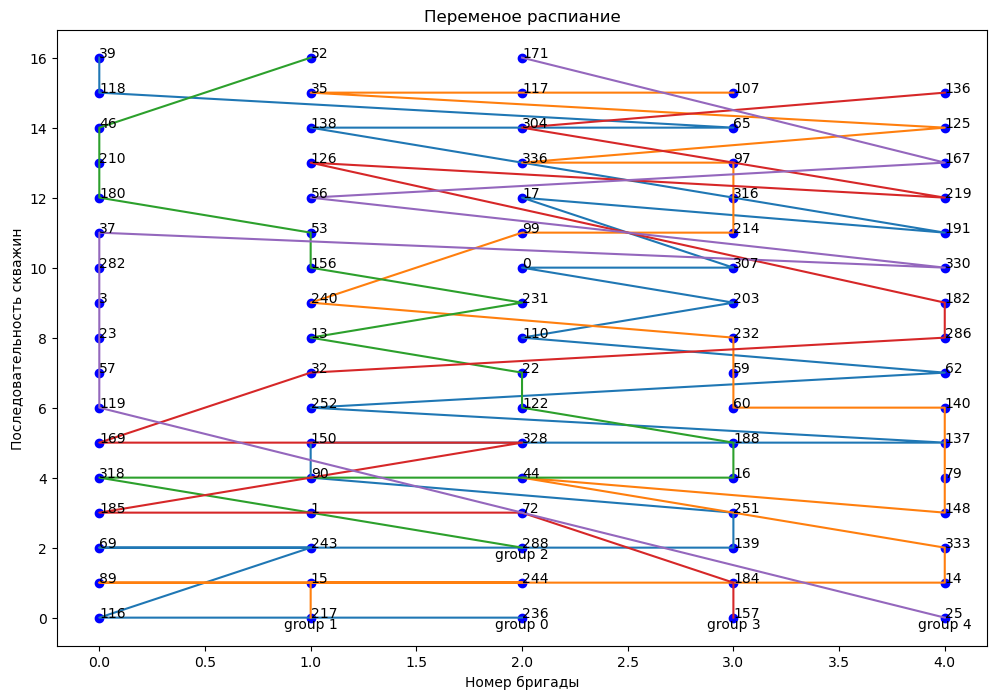

In [26]:
plt.figure(figsize=(12,8))
yshape=R_.shape[1]
xshape=R_.shape[0]
#y=np.empty(yshape,dtype=np.int16)
x=np.arange(yshape)
#x=np.empty(yshape,dtype=np.int16)

for j in x:
    #y.fill(j)
    x_index=[]
    y_index=[]
    teta=0
    for i,r in enumerate(R_[:,j]):
        if (r>=0) and wsch.debit_functions[r].cs:
            I=np.where(R==r)
            #print(r,I)
            xr=I[0]
            yr=I[1]
            teta=xr[0]
            if xr.shape[0]>0:
            
                x_index.append(teta)
                y_index.append(yr[0])
            
            plt.scatter(yr[0],teta,c='blue',marker='o')
            plt.annotate(str(r),xy=(yr[0],teta))
            #teta+=1
    if len(y_index)>0:
        plt.plot(y_index,x_index)
        plt.annotate(text='group '+str(j),xy=(y_index[0],x_index[0]),verticalalignment='top', horizontalalignment='center')
        #r=R[j,i]
        
plt.xlabel('Номер бригады')
plt.ylabel('Последовательность скважин')
plt.title('Переменое распиание')
plt.savefig(path+'mutable '+str(k)+'.png')
plt.show()

In [28]:
R_[:,0]

array([236, 116, 243,  69, 139, 251,  90, 150, 137, 252,  62, 110, 141,
       203,   0, 307, 101,  17, 191, 316, 128, 221, 138,  65, 147, 118,
       178, 317, 279, 264, 256, 121, 105,  39,  96, 112, 199, 226, 326,
       285,  80,  77, 280, 260, 100, 267, 325,  34, 314, 209, 197, 170,
       172, 175, 179, 223, 297, 309,  73, 168,  33, 208, 338,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1])

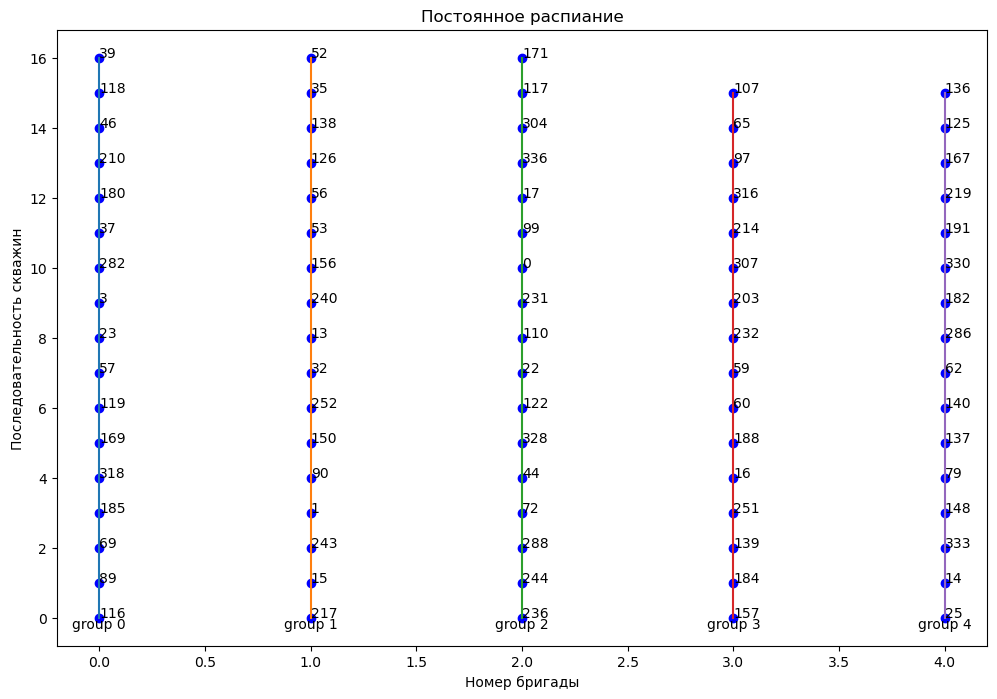

In [24]:
plt.figure(figsize=(12,8))
yshape=R_.shape[1]
xshape=R_.shape[0]
#y=np.empty(yshape,dtype=np.int16)
x=np.arange(yshape)
#x=np.empty(yshape,dtype=np.int16)

for j in x:
    #y.fill(j)
    x_index=[]
    y_index=[]
    teta=0
    for i,r in enumerate(R_[:,j]):
        if (r>=0) and wsch.debit_functions[r].cs:
            I=np.where(R==r)
            #print(r,I)
            xr=I[0]
            yr=I[1]
            teta=xr[0]
            if xr.shape[0]>0:
            
                x_index.append(teta)
                y_index.append(yr[0])
            
            plt.scatter(yr[0],teta,c='blue',marker='o')
            plt.annotate(str(r),xy=(yr[0],teta))
            #teta+=1
    if len(y_index)>0:
        plt.plot(y_index,x_index)
        plt.annotate(text='group '+str(j),xy=(y_index[0],x_index[0]),verticalalignment='top', horizontalalignment='center')
        #r=R[j,i]
    
plt.xlabel('Номер бригады')
plt.ylabel('Последовательность скважин')
plt.title('Постоянное распиание')
plt.savefig(path+'constant '+str(k)+'.png')    
plt.show()

In [45]:
group=np.load(path+'task\\groups.npy')

In [191]:
g1=wsch.ftmatrix[:,1]
g0=wsch.ftmatrix[:,0]

In [72]:
R_[:,14]

array([ 15, 116, 146, 139,  69, 319, 251, 102, 137, 140, 109, 119,  57,
       161,  59,  71,  13, 240, 156, 214, 219, 126,  97, 125, 117,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1])

In [47]:
np.where(R==25)

(array([0], dtype=int64), array([15], dtype=int64))

In [49]:
debit=osch.get_debit(R_,D_,wsch=wsch,mt=360)
print(debit.sum())

2619452.9321532296


In [52]:
debit=osch.get_debit(R_,D_,wsch=wsch,mt=360)
print(debit.sum())

2619069.4123857664


In [43]:
counter,pcount,mcount,supp=smotheness(R_,D_,T_,wsch)

In [40]:
print(counter,pcount,mcount,supp)

47 460.171875 0.03125 0


In [44]:
print(counter,pcount,mcount,supp)

44 454.96875 0.0625 0


In [38]:
def smotheness(R,D,T,wsch):
    counter=0
    pcount=0
    mcount=0
    supp=0
    suppd=0
    for j in np.arange(R.shape[1]):
        for i in np.arange(R.shape[0]):
            cw=R[i,j]
            if i+1<R.shape[0]:
                next_=R[i+1,j]
                t3=D[i+1,j]
                t4=T[i+1,j]
            else:
                next_=-1
                t3=np.inf
                t4=np.inf
            if (cw<0) or (next_<0):
                continue
            else:
                t1=D[i,j]
                t2=T[i,j]
                ts=wsch.ts[cw,next_]
                
                delta=t3-(ts+t2)
                if delta>0:
                    pcount=pcount+delta
                    counter+=1
                elif delta<0:
                    mcount=mcount-delta
                    counter+=1
                
                
                fun=wsch.debit_functions[cw]
                cs=fun.cs
                if cs:
                    s0=fun.supp[0]
                    s1=fun.supp[1]
                    
                    
                    if not (s0<=t1)&(s1>=t1):
                        supp+=1
    return counter,pcount,mcount,supp
                        
                
            

In [134]:
i=0

n=100
k=50

cT=[]
pyT=[]
N=[300,500,700,1000,3000]
#N=[300]
w=len(N)
seeds=np.random.randint(100,size=w)
while i<w:
    
    seed=seeds[i]
    n=N[i]
    index=np.arange(n)
    i+=1
    a=4
    b=10
    tr=np.random.random(n)*(b-a)+a
    a=0
    b=50
    Q0=np.random.random(n)*(b-a)+a
    Q1=np.random.random(n)*(b-a)+a
    ts=symmetric(n,a=0,b=15)/24
    #tr=op.get_random_array(n,1,a=4,b=10,seed=seed).reshape(-1)
    #ts=op.get_random_symmetric(n,a=0,b=15)/24
    #Q0=op.get_random_array(n,1,a=0,b=50).reshape(-1)
    #Q1=op.get_random_array(n,1,a=0,b=50,seed=seed).reshape(-1)
    #dQ=Q1-Q0
    t=(tr.sum()/k)*1.1
    shuffled=np.random.permutation(index)
    groups=shuffled[:k]
    used=np.array([])
    #f1 - ранжирование по интегральной функции дебита
    #print('i=',i,'seed',seed)
    for c in np.array([group.shape[0]*3,Q0.shape[0]]):
        wsch=osch.wells_schedule()
        wsch.engine='c'
        wsch.t=(tr.sum()/k)*1.5   
        wsch.tracing=False
        stop=c
        wsch.fun=wsch.f6
        group=groups.copy()
        wsch.fit(ts,tr,Q0,Q1,group,stop=stop,epsilon=tr.mean(),used=used)
        t1=time.perf_counter()
        trace=wsch.get_routes()
        t2=time.perf_counter()
        R_,T_,D_,O=osch.get_rout_time(trace)
        debit=osch.get_debit(R_,D_,wsch,mt=T_.max()*1.1)
        #cT.append(t2-t1)
        if c==group.shape[0]*3:
            cT.append(t2-t1)
        else:
            pyT.append(t2-t1)
        print(c,t2-t1,n,wsch.free.shape,debit.sum())
    #print('f2',debit1.sum())


150 0.8619070750028186 300 (0,) 490121.29094080563
300 1.2201086640016001 300 (0,) 490121.29094080563
150 1.5848337550014548 500 (0,) 1248042.7020983808
500 3.300660077999055 500 (0,) 1248042.7020983808
150 2.2972255120002956 700 (0,) 2401534.274875433
700 6.025707025000884 700 (0,) 2401534.274875433
150 3.337925031002669 1000 (0,) 4888711.31513122
1000 12.047517032999167 1000 (0,) 4888711.31513122
150 10.368612749000022 3000 (0,) 44307444.8688191
3000 106.42013788300028 3000 (0,) 44307444.8688191


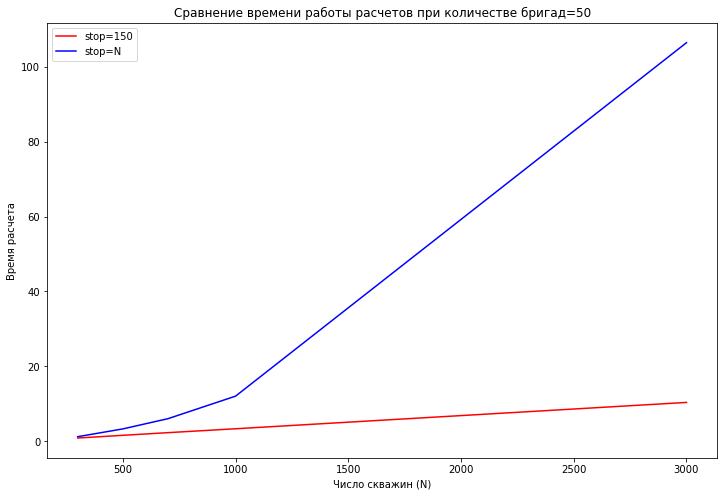

In [135]:
plt.figure(figsize=(12,8))
leg1,=plt.plot(N,cT,c='red')
leg2,=plt.plot(N,pyT,c='blue')
plt.legend([leg1,leg2],['stop=150','stop=N'])
plt.xlabel('Число скважин (N)')
plt.ylabel('Время расчета')
plt.title('Сравнение времени работы расчетов при количестве бригад=50')
plt.show()

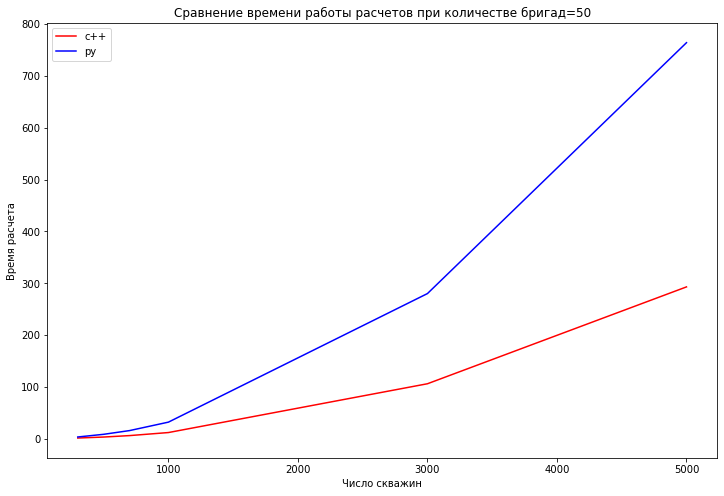

In [124]:
plt.figure(figsize=(12,8))
leg1,=plt.plot(N,cT,c='red')
leg2,=plt.plot(N,pyT,c='blue')
plt.legend([leg1,leg2],['c++','py'])
plt.xlabel('Число скважин')
plt.ylabel('Время расчета')
plt.title('Сравнение времени работы расчетов при количестве бригад=50')
plt.show()

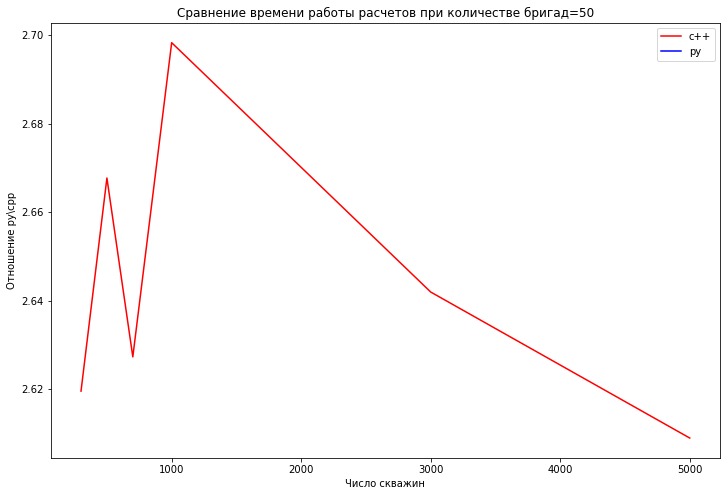

In [125]:
plt.figure(figsize=(12,8))
dif=np.array(pyT)/np.array(cT)
plt.plot(N,dif,c='red')

plt.legend([leg1,leg2],['c++','py'])
plt.xlabel('Число скважин')
plt.ylabel('Отношение py\cpp')
plt.title('Сравнение времени работы расчетов при количестве бригад=50')
plt.show()

In [18]:
R_[:,16]

IndexError: index 16 is out of bounds for axis 1 with size 16

In [101]:
pyT[-1]/60

5.294821093966675

In [ ]:
wsch.

In [1]:
import numpy as np
import examples as ex

In [2]:
array=np.array([[1,np.NINF,3],[4,5,7]],dtype=np.float32)*-1
numbers=np.zeros(shape=array.shape[0],dtype=np.int32)

In [3]:
op.get_optim_trajectory(array,criterion='min',engine='py')

(array([[0, 1],
        [0, 2]]), 8.0)

In [38]:
op.get_optim_trajectory(array,criterion='min',engine='c')

(array([[0, 1],
        [0, 2]]), 8.0)

In [4]:
array

array([[-1., inf, -3.],
       [-4., -5., -7.]], dtype=float32)

In [18]:
array=np.array([[1,np.NINF,3],[4,5,7]],dtype=np.float32)*-1

In [32]:
numbers=np.zeros(shape=array.shape[0],dtype=np.int32)
sum_=ex.assignment(array,numbers)
#sum_s=ex.assignment_(array)
print(numbers,sum_)

[0 2] 8.0


In [7]:
array

array([[-1., -2., -3.],
       [-4., -5., -7.]], dtype=float32)

In [45]:
array

array([[-1., inf, -3.],
       [-4., -5., -7.]], dtype=float32)

In [26]:
array=np.array([[1,np.NINF,3],[4,5,7]],dtype=np.float32)

In [13]:
array=np.array([[1,2,3],[4,5,7]],dtype=np.float64)

In [15]:
x=np.empty(shape=(100,1000,1000),dtype=np.float64)

In [16]:
x.strides

(8000000, 8000, 8)

In [12]:
array.dtype

dtype('float32')

In [23]:
op.assignment(array)

(array([[0, 1],
        [0, 2]]), 8.0)

In [10]:
array=np.array

8.0

In [7]:
numbers.shape[0]

2

In [8]:
array.shape[0]

2

In [22]:
t1=time.perf_counter()
sum_=ex.assignment(a)
t2=time.perf_counter()
print(t2-t1,sum_)

0.00018473900013304956 162.67688106738484


In [9]:
ct=[]
pyt=[]
csum=[]
pysum=[]
n=np.array([100,200,300,400,500,1000],dtype=np.int32)

a=30
b=100

#k=30000
j=0
for i in n:
    shape=(16,i)
    array=((b-a)*np.random.random_sample(shape)+a)*-1
    number=np.zeros(16,dtype=np.int32)
    t1=time.perf_counter()
    sum_=ex.assignment(array,number)
    t2=time.perf_counter()
    print('c ',t2-t1,sum_)
    ct.append(t2-t1)
    csum.append(sum_)    
    t1=time.perf_counter()
    res,sum_=op.assignment(array)
    t2=time.perf_counter()
    print('py ',t2-t1,sum_)
    
    pyt.append(t2-t1)
    print(pyt[j]/ct[j])
    pysum.append(sum_)
    j+=1

c  0.0003305369999964114 1590.6561425981238
py  0.004102582999991 1590.6561425981238
12.411872195958521
c  0.0005143699999905493 1593.171184285335
py  0.0074933789999818146 1593.171184285335
14.568071621827658
c  0.000762197000000242 1595.1099073512542
py  0.012492487000002939 1595.1099073512542
16.390102558785944
c  0.0009831589999862445 1597.9257647845402
py  0.02075470500000165 1597.9257647845402
21.11022225325917
c  0.0013061490000154663 1598.1055003951622
py  0.01921189699999104 1598.1055003951622
14.708809637923046
c  0.0022911200000237386 1598.6532106164032
py  0.03451742100000388 1598.6532106164032
15.065741209385033


In [14]:
del array

Text(0.5, 1.0, 'Сравнение работы алгоритмов C++ via Python')

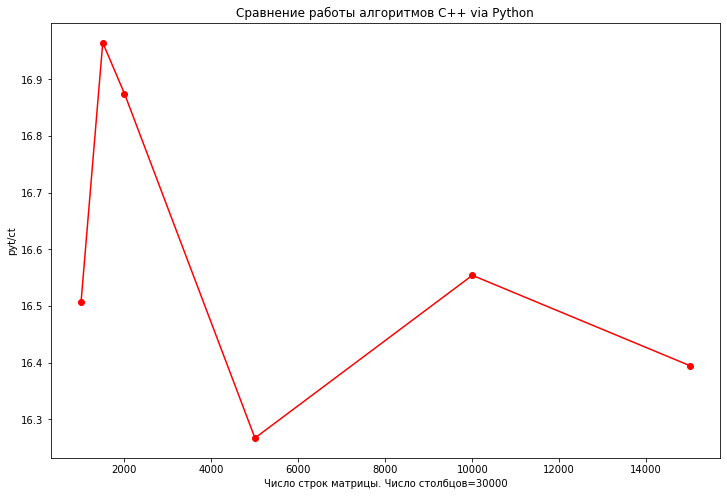

In [9]:
leg=[]
plt.figure(figsize=(12,8))
plt.plot(n,np.array(pyt)/np.array(ct),c='red',marker='o')
plt.xlabel('Число строк матрицы. Число столбцов='+str(k))
plt.ylabel('pyt/ct')

plt.title('Сравнение работы алгоритмов C++ via Python')

Text(0.5, 1.0, 'Сравнение работы алгоритмов C++ via Python')

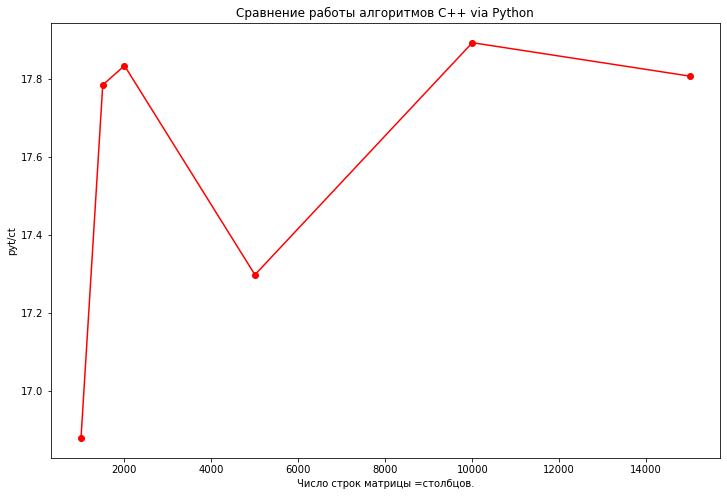

In [13]:
leg=[]
plt.figure(figsize=(12,8))
plt.plot(n,np.array(pyt)/np.array(ct),c='red',marker='o')
plt.xlabel('Число строк матрицы =столбцов.')
plt.ylabel('pyt/ct')

plt.title('Сравнение работы алгоритмов C++ via Python')

Text(0.5, 1.0, 'Сравнение работы алгоритмов C++ via Python')

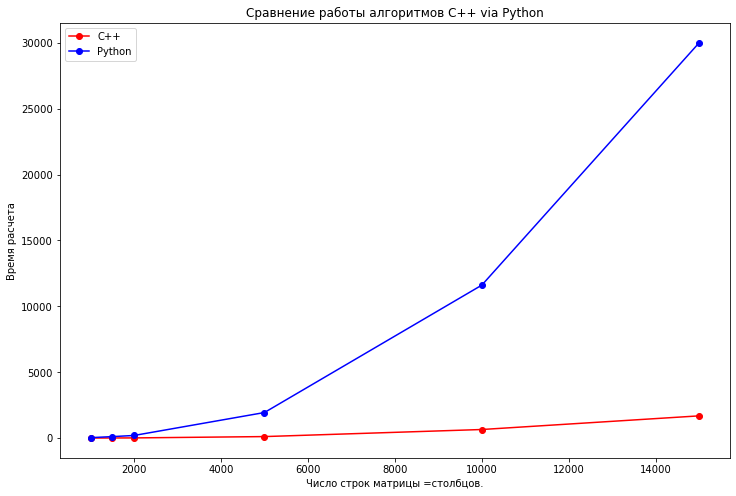

In [12]:
leg=[]
plt.figure(figsize=(12,8))
leg1,=plt.plot(n,ct,c='red',marker='o')
leg2,=plt.plot(n,pyt,c='blue',marker='o')
leg.append(leg1)
leg.append(leg2)
plt.xlabel('Число строк матрицы =столбцов.')
plt.ylabel('Время расчета')
plt.legend(leg,['C++','Python'])
plt.title('Сравнение работы алгоритмов C++ via Python')

Text(0.5, 1.0, 'Сравнение работы алгоритмов C++ via Python')

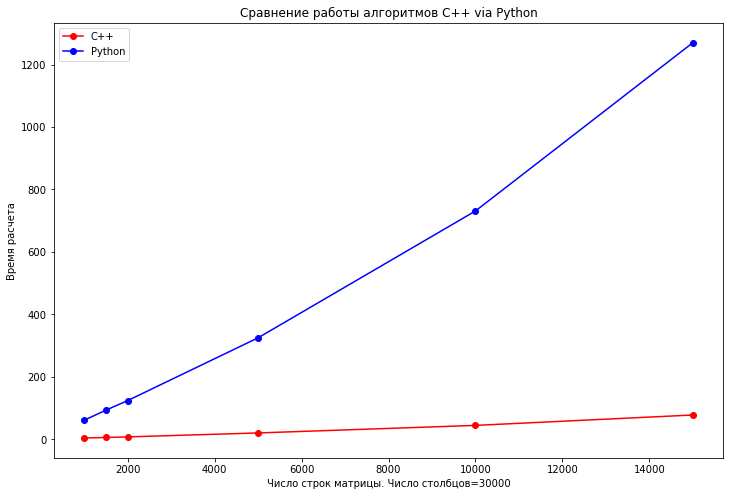

In [3]:
leg=[]
plt.figure(figsize=(12,8))
leg1,=plt.plot(n,ct,c='red',marker='o')
leg2,=plt.plot(n,pyt,c='blue',marker='o')
leg.append(leg1)
leg.append(leg2)
plt.xlabel('Число строк матрицы. Число столбцов='+str(k))
plt.ylabel('Время расчета')
plt.legend(leg,['C++','Python'])
plt.title('Сравнение работы алгоритмов C++ via Python')

Text(0.5, 1.0, 'Сравнение работы алгоритмов C++ via Python')

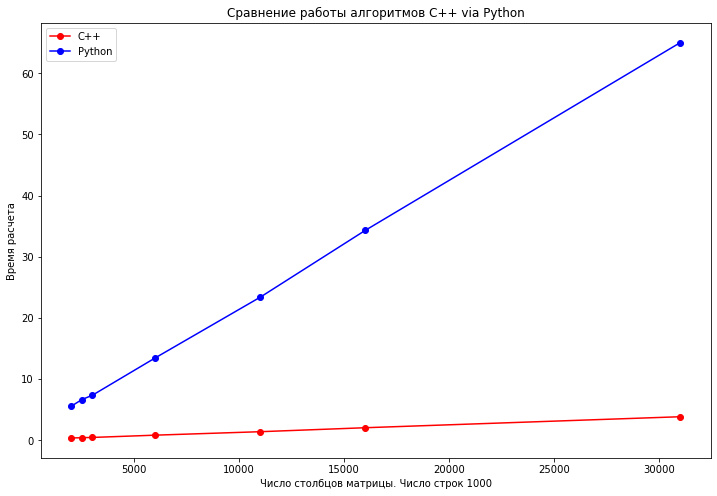

In [58]:
leg=[]
plt.figure(figsize=(12,8))
leg1,=plt.plot(n,ct,c='red',marker='o')
leg2,=plt.plot(n,pyt,c='blue',marker='o')
leg.append(leg1)
leg.append(leg2)
plt.xlabel('Число столбцов матрицы. Число строк '+str(k))
plt.ylabel('Время расчета')
plt.legend(leg,['C++','Python'])
plt.title('Сравнение работы алгоритмов C++ via Python')

Text(0.5, 1.0, 'Сравнение работы алгоритмов C++ via Python')

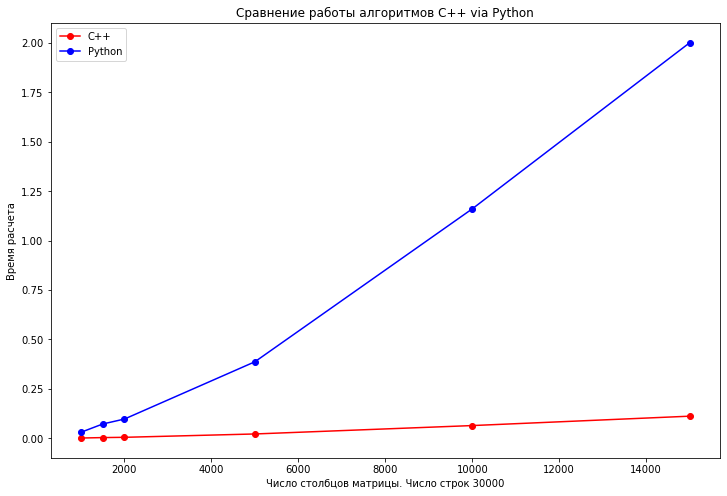

In [16]:
leg=[]
ct_=np.array(ct)/np.array(n)
pyt_=np.array(pyt)/np.array(n)
plt.figure(figsize=(12,8))
leg1,=plt.plot(n,ct_,c='red',marker='o')
leg2,=plt.plot(n,pyt_,c='blue',marker='o')
leg.append(leg1)
leg.append(leg2)
plt.xlabel('Число столбцов матрицы. Число строк '+str(k))
plt.ylabel('Время расчета')
plt.legend(leg,['C++','Python'])
plt.title('Сравнение работы алгоритмов C++ via Python')

Text(0.5, 1.0, 'Сравнение работы алгоритмов C++ via Python')

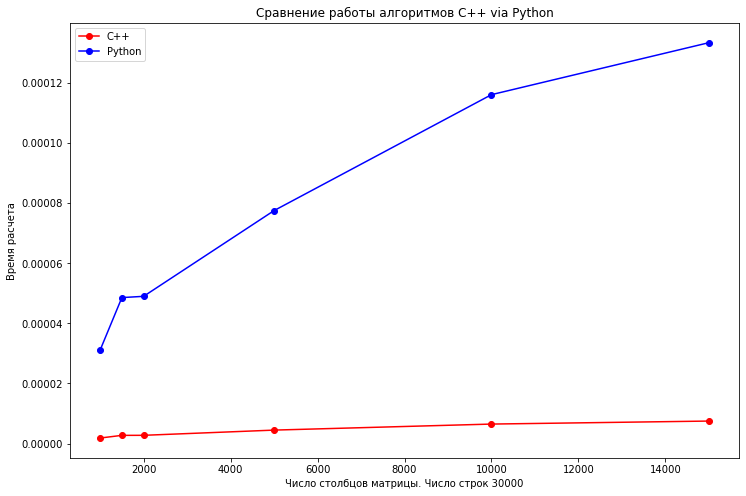

In [15]:
leg=[]
n2=np.power(np.array(n),2)
ct_=np.array(ct)/n2
pyt_=np.array(pyt)/n2
plt.figure(figsize=(12,8))
leg1,=plt.plot(n,ct_,c='red',marker='o')
leg2,=plt.plot(n,pyt_,c='blue',marker='o')
leg.append(leg1)
leg.append(leg2)
plt.xlabel('Число столбцов матрицы. Число строк '+str(k))
plt.ylabel('Время расчета')
plt.legend(leg,['C++','Python'])
plt.title('Сравнение работы алгоритмов C++ via Python')

Text(0.5, 1.0, 'Сравнение работы алгоритмов C++ via Python')

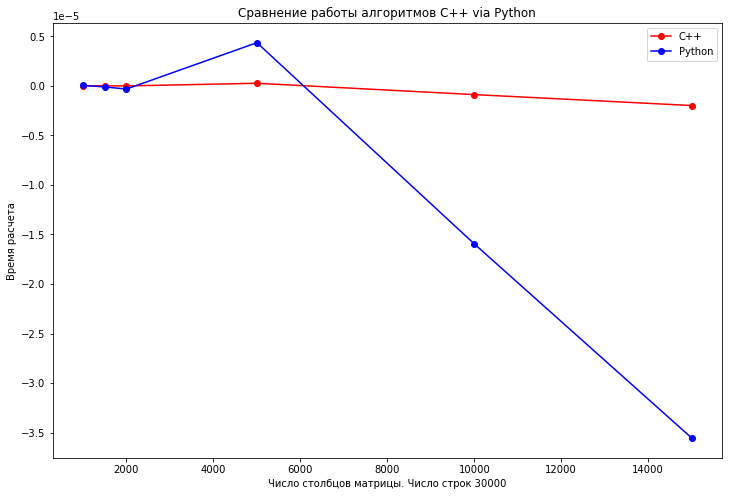

In [17]:
leg=[]
n3=np.power(np.array(n),3)
ct_=np.array(ct)/n3
pyt_=np.array(pyt)/n3
plt.figure(figsize=(12,8))
leg1,=plt.plot(n,ct_,c='red',marker='o')
leg2,=plt.plot(n,pyt_,c='blue',marker='o')
leg.append(leg1)
leg.append(leg2)
plt.xlabel('Число столбцов матрицы. Число строк '+str(k))
plt.ylabel('Время расчета')
plt.legend(leg,['C++','Python'])
plt.title('Сравнение работы алгоритмов C++ via Python')

In [11]:
def s(x,t,n):
    def a(x):
        #return np.exp(-x**2)
        return 0.5
    def f(x):
        #return 1
        return np.sin(x)
    def b(x):
        #return 1
        return 0
    def into(x,t,sqt,n):
        x1=x+2*a(x)*sqt
        x2=x-2*a(x)*sqt
        x3=x+2*b(x)*t
        #print(x1,x2)
        if n<=1:
            return 0.25*(f(x1)+f(x2))+0.5*f(x3)
        n=n-1
        return 0.25*(into(x1,t,sqt,n)+into(x2,t,sqt,n))+0.5*into(x3,t,sqt,n)
    sqt=np.power(t/n,0.5)
    #mul=np.power(0.25,n)
    return into(x,t/n,sqt,n)


In [2]:
x=np.linspace(0,np.pi)
t=np.linspace(0,5)
z=np.empty(shape=(x.shape[0],t.shape[0]))
X, T = np.meshgrid(x, t)
Z=np.empty(shape=(x.shape[0],t.shape[0]))

In [9]:
n=8
t1=time.perf_counter()
for i,t_ in enumerate(t):
    for j,x_ in enumerate(x):
        Z[i,j]=ex.get_value(x_,t_,n)
t2=time.perf_counter()
print(t2-t1)

5.63834784699975


In [5]:
n=8
for i,t_ in enumerate(t):
    for j,x_ in enumerate(x):
        z[i,j]=s(x_,t_,n)

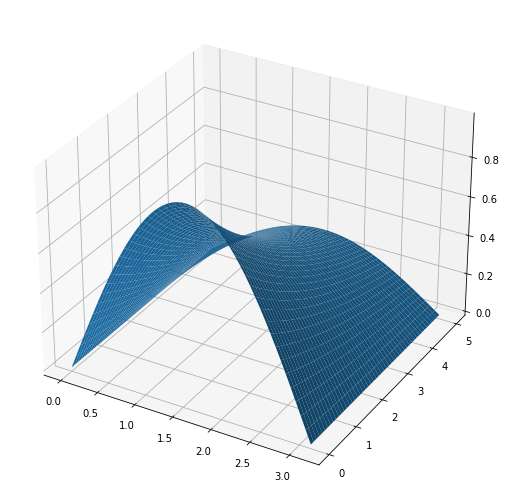

In [7]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 # Creating dataset
#x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
#y = x.copy().T # transpose
#z = (np.sin(x **2) + np.cos(y **2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(X, T, z)
 
# show plot
plt.show()

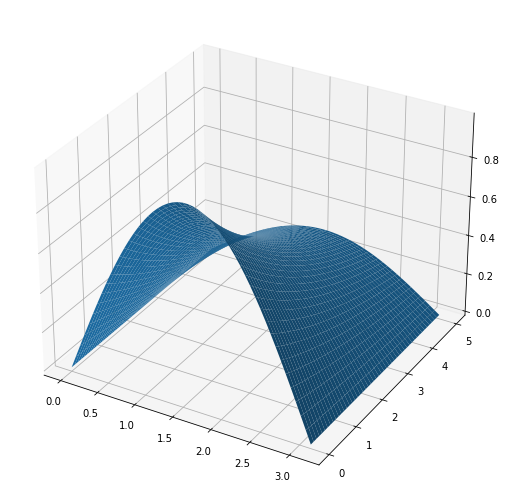

In [4]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 # Creating dataset
#x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
#y = x.copy().T # transpose
#z = (np.sin(x **2) + np.cos(y **2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(X, T, Z)
 
# show plot
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(10)+1,y)
plt.xlabel('степень оператора')
plt.ylabel('Значение')
plt.show()

In [5]:
sn=np.arange(20)+1

In [16]:
p=np.pi/2
pyy=[s(p,1,i) for i in sn]

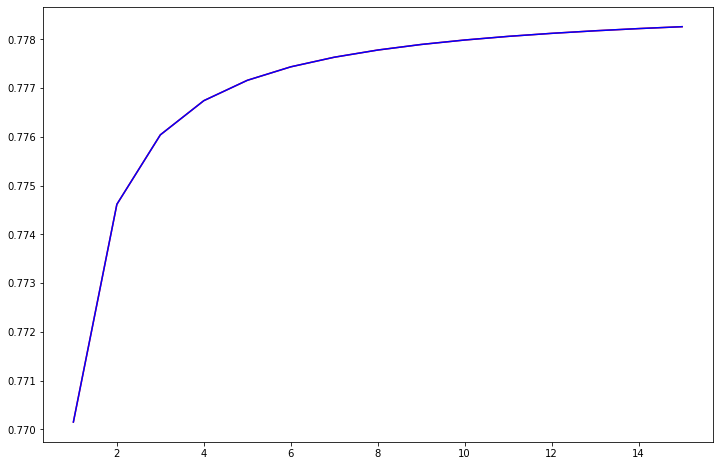

In [17]:
plt.figure(figsize=(12,8))
plt.plot(sn,pyy,c='red')
plt.plot(sn,cppy,c='blue')
plt.show()

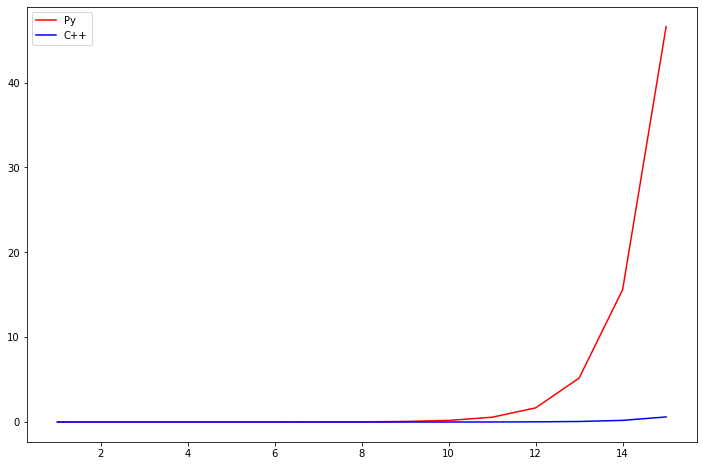

In [19]:
plt.figure(figsize=(12,8))
leg1,=plt.plot(sn,pyT,c='red')
leg2,=plt.plot(sn,cppT,c='blue')
plt.legend([leg1,leg2],['Py','C++'])
plt.show()

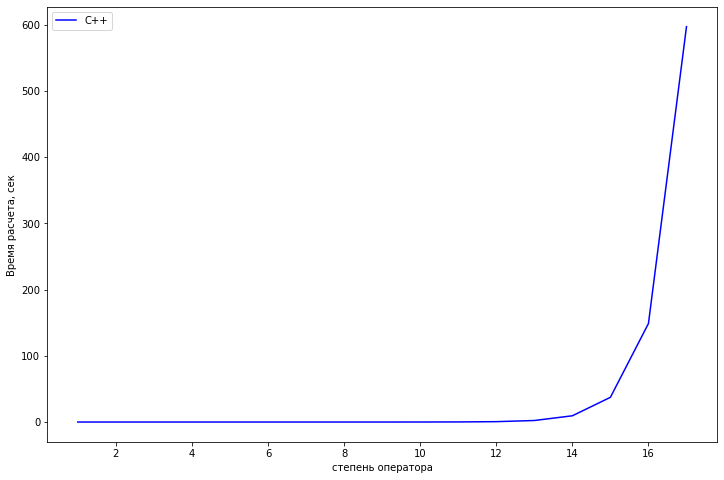

In [7]:
plt.figure(figsize=(12,8))
#leg1,=plt.plot(sn,pyT,c='red')
leg2,=plt.plot(sn[:len(cppT)],cppT,c='blue')
plt.legend([leg2],['C++'])
plt.xlabel("степень оператора")
plt.ylabel("Время расчета, сек")
plt.show()

In [235]:
array=np.empty(shape=(10,10))

In [224]:
array[0].fill(10.)

In [1]:
from multiprocessing import Process,Queue
import os

In [266]:
workers_number=4

def worker(array,task:Queue,answers:Queue,process_index:int):
    def fill(array,row:np.int32,value:np.float16):
        #print(row,value)
        if row<array.shape[0]:            
            array[row].fill(value)
            
            return True
        else:
            return False
    print(process_index)    
    while not task.empty():
        val=task.get()
        print(val)
        index=val[0]
        value=val[1]
        answer=fill(array,index,value)
        answers.put(process_index,os.getpid(),val)
        
def main(array):
    tasks=Queue()
    answers=Queue()
    for i in range(array.shape[0]):
        tasks.put((i,float(i)))
    workers=[]
    for process_index in range(workers_number):
        worker_process=Process(target=worker,args=(array,tasks,answers,process_index,))
        workers.append(worker_process)
        print('appended pi=',process_index)
    print('workers ',len(workers))
    for wp in workers:        
        wp.start()
    for wp in workers:
        wp.join()
    

In [267]:
main(array)

appended pi= 0
appended pi= 1
appended pi= 2
appended pi= 3
workers  4


In [6]:
def worker(task:Queue,answers:Queue,process_index:int):
    def fill(row:np.int32,value:np.float16):
        return row*value

    print(process_index)    
    while not task.empty():
        val=task.get()
        print(val)
        index=val[0]
        value=val[1]
        answer=fill(index,value)
        answers.put(process_index,os.getpid(),val,answer)
        
tasks=Queue()
answers=Queue()
for i in range(10):
    tasks.put((i,float(i)))
workers=[]
for process_index in range(workers_number):
    worker_process=Process(target=worker,args=(tasks,answers,process_index,))
    workers.append(worker_process)
for wp in workers:
    wp.start()
    print(wp.pid,wp.name,wp.is_alive())
    
for wp in workers:
    
    wp.join()
    

16216 Process-5 True
15900 Process-6 True
15712 Process-7 True
16176 Process-8 True


In [7]:
tasks.qsize()

10

In [8]:
answers.qsize()

0

In [ ]:
while not tasks.empty():
    ans=answers.get()
    print('answer',ans)

In [2]:
workers_number=4

def worker(task:Queue,answers:Queue,process_index:int):
    def fill(row:np.int32,value:np.float16):
        return row*value

    print(process_index)    
    while not task.empty():
        val=task.get()
        print(val)
        index=val[0]
        value=val[1]
        answer=fill(index,value)
        answers.put(process_index,os.getpid(),val,answer)
        
def main1():
    tasks=Queue()
    answers=Queue()
    for i in range(10):
        tasks.put((i,float(i)))
    workers=[]
    for process_index in range(workers_number):
        worker_process=Process(target=worker,args=(tasks,answers,process_index,))
        workers.append(worker_process)
        print('appended pi=',process_index)
    print('workers ',len(workers))
    for wp in workers:        
        wp.start()
        print('started')
    for wp in workers:
        wp.join()

In [273]:
main1()

appended pi= 0
appended pi= 1
appended pi= 2
appended pi= 3
workers  4
started
started
started
started


In [ ]:
from multiprocessing import Process, Queue

def f(q):
    q.put([42, None, 'hello'])

if __name__ == '__main__':
    q = Queue()
    p = Process(target=f, args=(q,))
    p.start()
    print(q.get())    # prints "[42, None, 'hello']"
    p.join()

In [8]:
arx=np.array([1,2,3,4,5],dtype=np.int64)
ary=np.array([1,2,3,4,5],dtype=np.int64)

In [5]:
index=np.array([0,3,4],dtype=np.int64)
nindex=np.array([4,3,0],dtype=np.int64)

In [9]:
arx[index]=arx[nindex]
ary[index]=ary[nindex]

In [10]:
arx

array([5, 2, 3, 4, 1], dtype=int64)

In [11]:
ary

array([5, 2, 3, 4, 1], dtype=int64)